# DATA CLEANING PROCESS
  1. Identification of missing values
  2. Data entry errors (#,@,..,a-z in numeric columns)
  3. duplicates check

In [1]:
AD <- read.csv("/kaggle/input/ecg-arrhythmia-classification-dataset/MIT-BIH Arrhythmia Database.csv")

In [2]:
names(AD)

[1] "record"          "type"            "X0_pre.RR"       "X0_post.RR"     
 [5] "X0_pPeak"        "X0_tPeak"        "X0_rPeak"        "X0_sPeak"       
 [9] "X0_qPeak"        "X0_qrs_interval" "X0_pq_interval"  "X0_qt_interval" 
[13] "X0_st_interval"  "X0_qrs_morph0"   "X0_qrs_morph1"   "X0_qrs_morph2"  
[17] "X0_qrs_morph3"   "X0_qrs_morph4"   "X1_pre.RR"       "X1_post.RR"     
[21] "X1_pPeak"        "X1_tPeak"        "X1_rPeak"        "X1_sPeak"       
[25] "X1_qPeak"        "X1_qrs_interval" "X1_pq_interval"  "X1_qt_interval" 
[29] "X1_st_interval"  "X1_qrs_morph0"   "X1_qrs_morph1"   "X1_qrs_morph2"  
[33] "X1_qrs_morph3"   "X1_qrs_morph4"

In [3]:
nrow(AD)
ncol(AD)

[1] 100689

[1] 34

In [4]:
head(AD)

,record,type,X0_pre.RR,X0_post.RR,X0_pPeak,X0_tPeak,X0_rPeak,X0_sPeak,X0_qPeak,X0_qrs_interval,⋯,X1_qPeak,X1_qrs_interval,X1_pq_interval,X1_qt_interval,X1_st_interval,X1_qrs_morph0,X1_qrs_morph1,X1_qrs_morph2,X1_qrs_morph3,X1_qrs_morph4
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,101,N,76,313,0.07434712,-0.1605480,1.0364014,-0.2856625,-0.02682365,41,⋯,0.025930319,2,18,22,2,0.025930319,0.025930319,0.025930319,0.025436180,0.025436180
2,101,N,313,315,-0.05207889,-0.2647843,0.8865969,-0.3662977,-0.05971041,21,⋯,-0.042008529,26,27,62,9,-0.042008529,-0.029497609,0.005011964,0.030891545,0.002985601
3,101,N,315,321,-0.06215134,-0.2969825,0.9918591,-0.4103062,-0.06568633,22,⋯,0.009528473,3,8,12,1,0.009528473,0.009528473,0.008785553,0.008785553,0.008368393
4,101,N,321,336,-0.06332193,-0.2813862,1.0349029,-0.4038801,-0.07174976,22,⋯,-0.020535588,6,9,16,1,-0.020535588,-0.020256978,-0.018965495,-0.016967876,-0.014555172
5,101,N,336,344,-0.06291492,1.0469137,1.0464080,1.0464080,-0.07463881,11,⋯,0.016052502,16,5,31,10,0.016052502,0.006741551,0.002781526,-0.007798090,-0.051154968
6,101,N,344,324,-0.08303952,-0.2930229,0.9315455,-0.4334854,-0.08874469,22,⋯,-0.036339376,8,10,19,1,-0.036339376,-0.034672701,-0.026984915,-0.022147345,-0.013531422


### MISSING VALUE CHECK

In [5]:
summary(AD)


     record          type             X0_pre.RR        X0_post.RR    
 Min.   :100.0   Length:100689      Min.   :  11.0   Min.   :   6.0  
 1st Qu.:115.0   Class :character   1st Qu.: 230.0   1st Qu.: 230.0  
 Median :203.0   Mode  :character   Median : 267.0   Median : 266.0  
 Mean   :173.7                      Mean   : 279.4   Mean   : 278.6  
 3rd Qu.:219.0                      3rd Qu.: 324.0   3rd Qu.: 322.0  
 Max.   :234.0                      Max.   :2114.0   Max.   :2114.0  
    X0_pPeak           X0_tPeak          X0_rPeak         X0_sPeak      
 Min.   :-3.09439   Min.   :-2.0064   Min.   :-2.373   Min.   :-3.6225  
 1st Qu.:-0.05475   1st Qu.:-0.2491   1st Qu.: 0.754   1st Qu.:-0.7818  
 Median : 0.01587   Median : 0.2403   Median : 1.105   Median :-0.5163  
 Mean   : 0.04977   Mean   : 0.3723   Mean   : 1.054   Mean   :-0.1344  
 3rd Qu.: 0.12581   3rd Qu.: 0.9282   3rd Qu.: 1.424   3rd Qu.: 0.8572  
 Max.   : 3.82112   Max.   : 4.1183   Max.   : 4.019   Max.   : 4.0189  

In [6]:
sapply(AD, function(x) mean(is.na(x)) * 100)


record            type       X0_pre.RR      X0_post.RR        X0_pPeak 
              0               0               0               0               0 
       X0_tPeak        X0_rPeak        X0_sPeak        X0_qPeak X0_qrs_interval 
              0               0               0               0               0 
 X0_pq_interval  X0_qt_interval  X0_st_interval   X0_qrs_morph0   X0_qrs_morph1 
              0               0               0               0               0 
  X0_qrs_morph2   X0_qrs_morph3   X0_qrs_morph4       X1_pre.RR      X1_post.RR 
              0               0               0               0               0 
       X1_pPeak        X1_tPeak        X1_rPeak        X1_sPeak        X1_qPeak 
              0               0               0               0               0 
X1_qrs_interval  X1_pq_interval  X1_qt_interval  X1_st_interval   X1_qrs_morph0 
              0               0               0               0               0 
  X1_qrs_morph1   X1_qrs_morph2   X1_qrs_morph3   X1_qrs_morph4 
              0               0               0               0

In [7]:
#count non-standard values like a-z,#,@ in numeric columns
sapply(AD, function(x) sum(grepl("[^a-zA-Z0-9 .,-]", x, perl = TRUE), na.rm = TRUE))


record            type       X0_pre.RR      X0_post.RR        X0_pPeak 
              0               0               0               0               0 
       X0_tPeak        X0_rPeak        X0_sPeak        X0_qPeak X0_qrs_interval 
              0               0               0               0               0 
 X0_pq_interval  X0_qt_interval  X0_st_interval   X0_qrs_morph0   X0_qrs_morph1 
              0               0               0               0               0 
  X0_qrs_morph2   X0_qrs_morph3   X0_qrs_morph4       X1_pre.RR      X1_post.RR 
              0               0               0               0               0 
       X1_pPeak        X1_tPeak        X1_rPeak        X1_sPeak        X1_qPeak 
              0               0               0               0               0 
X1_qrs_interval  X1_pq_interval  X1_qt_interval  X1_st_interval   X1_qrs_morph0 
              0               0               0               0               0 
  X1_qrs_morph1   X1_qrs_morph2   X1_qrs_morph3   X1_qrs_morph4 
              0               0               0               0

DUPLICATES CHECK

In [8]:
# Find all duplicate rows (matching on all columns)
duplicate_vec <- duplicated(AD) | duplicated(AD, fromLast = TRUE)

# Extract the duplicate rows
duplicates <- AD[duplicate_vec, ]

# Count number of exact duplicate rows
num_duplicates <- nrow(duplicates)
print(paste("Number of exact duplicate rows:", num_duplicates))

# To identify which rows are duplicates of each other
row_nums <- which(duplicate_vec)
duplicate_df <- data.frame(row_num = row_nums, AD[row_nums, ])

# Create a unique identifier for each unique row
duplicate_df$group <- match(
  do.call(paste, c(duplicate_df[, -1], sep = "___")), 
  unique(do.call(paste, c(duplicate_df[, -1], sep = "___")))
)

# Sort by group to see which rows are duplicates of each other
duplicate_df <- duplicate_df[order(duplicate_df$group), ]
head(duplicate_df, 5)

[1] "Number of exact duplicate rows: 0"


Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


row_num,record,type,X0_pre.RR,X0_post.RR,X0_pPeak,X0_tPeak,X0_rPeak,X0_sPeak,X0_qPeak,⋯,X1_qrs_interval,X1_pq_interval,X1_qt_interval,X1_st_interval,X1_qrs_morph0,X1_qrs_morph1,X1_qrs_morph2,X1_qrs_morph3,X1_qrs_morph4,group
<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>


In [9]:
sum(duplicated(AD))

[1] 0

### DATA TYPE CHECK

In [5]:
str(AD)

'data.frame':	100689 obs. of  34 variables:
 $ record         : int  101 101 101 101 101 101 101 101 101 101 ...
 $ type           : chr  "N" "N" "N" "N" ...
 $ X0_pre.RR      : int  76 313 315 321 336 344 324 313 313 310 ...
 $ X0_post.RR     : num  313 315 321 336 344 324 313 313 310 329 ...
 $ X0_pPeak       : num  0.0743 -0.0521 -0.0622 -0.0633 -0.0629 ...
 $ X0_tPeak       : num  -0.161 -0.265 -0.297 -0.281 1.047 ...
 $ X0_rPeak       : num  1.036 0.887 0.992 1.035 1.046 ...
 $ X0_sPeak       : num  -0.286 -0.366 -0.41 -0.404 1.046 ...
 $ X0_qPeak       : num  -0.0268 -0.0597 -0.0657 -0.0717 -0.0746 ...
 $ X0_qrs_interval: int  41 21 22 22 11 22 23 22 25 22 ...
 $ X0_pq_interval : int  18 4 3 4 4 3 3 3 5 4 ...
 $ X0_qt_interval : int  66 33 32 33 16 33 34 31 37 32 ...
 $ X0_st_interval : int  7 8 7 7 1 8 8 6 7 6 ...
 $ X0_qrs_morph0  : num  -0.0268 -0.0597 -0.0657 -0.0717 -0.0746 ...
 $ X0_qrs_morph1  : num  -0.00124 0.10403 0.05146 0.05938 -0.05452 ...
 $ X0_qrs_morph2  : num  0.

### Type identification of features

In [7]:
AD$type <- as.factor(AD$type)
unique(AD$type)
table(AD$type)


[1] N    Q    SVEB VEB  F   
Levels: F N Q SVEB VEB


    F     N     Q  SVEB   VEB 
  803 90083    15  2779  7009 

## TEST AND TRAIN SET SPLIT

In [9]:
library(dplyr)
library(caret)

set.seed(100000)

train_indices <- createDataPartition(AD$type, p = 0.8, list = FALSE)

trainAD <- AD[train_indices, ]
testAD <- AD[-train_indices, ]

# Check distribution
table(trainAD$type)
table(testAD$type)

trainAD$record <- NULL
testAD$record <- NULL


    F     N     Q  SVEB   VEB 
  643 72067    12  2224  5608 


    F     N     Q  SVEB   VEB 
  160 18016     3   555  1401 

DOWNSAMPLING THE NORMAL CLASS

In [10]:
library(dplyr)

# Stratified sampling: Keep all non-"N" and randomly sample 30,000 from "N"
set.seed(8000000)  # For reproducibility
trainAD <- trainAD %>%
  filter(type != "N") %>%  # Keep all non-N data
  bind_rows(sample_n(filter(trainAD, type == "N"), 30000))  # Randomly sample 30,000 from "N"

# Check the result
table(trainAD$type)



    F     N     Q  SVEB   VEB 
  643 30000    12  2224  5608 

In [11]:
str(trainAD)

'data.frame':	38487 obs. of  33 variables:
 $ type           : Factor w/ 5 levels "F","N","Q","SVEB",..: 3 4 4 5 5 5 5 5 5 5 ...
 $ X0_pre.RR      : int  24 333 237 200 178 177 167 192 188 170 ...
 $ X0_post.RR     : num  357 414 459 178 431 167 485 422 170 463 ...
 $ X0_pPeak       : num  0.04912 0.03587 -0.00542 -0.39877 0.76975 ...
 $ X0_tPeak       : num  1.399 -0.351 -0.303 0.358 0.78 ...
 $ X0_rPeak       : num  1.114 1.296 1.355 1.062 0.943 ...
 $ X0_sPeak       : num  -0.361 -0.401 -0.324 -1.413 -1.379 ...
 $ X0_qPeak       : num  -1.95206 0.00274 -0.10528 -0.40247 -0.55947 ...
 $ X0_qrs_interval: int  40 23 22 69 58 53 58 72 74 56 ...
 $ X0_pq_interval : int  16 5 8 4 41 46 41 39 36 39 ...
 $ X0_qt_interval : int  69 35 34 113 182 133 188 158 142 180 ...
 $ X0_st_interval : int  13 7 4 40 83 34 89 47 32 85 ...
 $ X0_qrs_morph0  : num  -1.95206 0.00274 -0.10528 -0.40247 -0.55947 ...
 $ X0_qrs_morph1  : num  -1.275 0.188 0.236 -0.279 -0.463 ...
 $ X0_qrs_morph2  : num  -0.4912 1

# SMOTE 1-Themis Package

In [12]:
# changing the N,VEB,SVEB and F as 1 and Q as 0
trainAD_SMOTE <- trainAD
# trainAD_SMOTE$type <- ifelse(trainAD_SMOTE$type %in% c("N", "Q", "VEB", "F"), 1, 0)
# trainAD_SMOTE$type <- as.factor(trainAD_SMOTE$type)
# str(trainAD_SMOTE)

In [14]:
library(tidymodels)
library(themis)
set.seed(7999)

data_recipe <- recipe(type ~ ., data = trainAD_SMOTE) %>%
  step_smote(type, over_ratio = 0.1)

In [15]:
prepped_recipe <- prep(data_recipe)
balanced_data <- bake(prepped_recipe, new_data = NULL)
table(balanced_data$type)


    F     N     Q  SVEB   VEB 
 3000 30000  3000  3000  5608 

In [16]:
trainAD_SMOTE <- balanced_data

In [17]:
# Remove "Q" type from trainAD_SMOTE
trainAD_SMOTE_noQ <- trainAD_SMOTE %>% 
  filter(type != "Q")

# Extract "Q" type rows from trainAD
Q_rows <- trainAD %>% 
  filter(type == "Q")

# Combine them
trainAD_SMOTE <- bind_rows(trainAD_SMOTE_noQ, Q_rows)


In [18]:
table(trainAD_SMOTE$type)


    F     N     Q  SVEB   VEB 
 3000 30000    12  3000  5608 

In [19]:
trainAD_SMOTE$type <- as.factor(trainAD_SMOTE$type)

In [20]:
str(trainAD_SMOTE)

tibble [41,620 × 33] (S3: tbl_df/tbl/data.frame)
 $ X0_pre.RR      : num [1:41620] 333 237 200 178 177 167 192 188 170 189 ...
 $ X0_post.RR     : num [1:41620] 414 459 178 431 167 485 422 170 463 467 ...
 $ X0_pPeak       : num [1:41620] 0.03587 -0.00542 -0.39877 0.76975 0.4867 ...
 $ X0_tPeak       : num [1:41620] -0.351 -0.303 0.358 0.78 0.387 ...
 $ X0_rPeak       : num [1:41620] 1.296 1.355 1.062 0.943 0.805 ...
 $ X0_sPeak       : num [1:41620] -0.401 -0.324 -1.413 -1.379 -1.571 ...
 $ X0_qPeak       : num [1:41620] 0.00274 -0.10528 -0.40247 -0.55947 -0.34439 ...
 $ X0_qrs_interval: num [1:41620] 23 22 69 58 53 58 72 74 56 65 ...
 $ X0_pq_interval : num [1:41620] 5 8 4 41 46 41 39 36 39 40 ...
 $ X0_qt_interval : num [1:41620] 35 34 113 182 133 188 158 142 180 144 ...
 $ X0_st_interval : num [1:41620] 7 4 40 83 34 89 47 32 85 39 ...
 $ X0_qrs_morph0  : num [1:41620] 0.00274 -0.10528 -0.40247 -0.55947 -0.34439 ...
 $ X0_qrs_morph1  : num [1:41620] 0.188 0.236 -0.279 -0.463 -0.256 

# SMOTE 2 - USING SMOTEFAMILY

In [22]:
library(UBL)
trainAD_SMOTE2 <- SmoteClassif(type ~ ., trainAD, 
                          C.perc = list(F = 3, N = 1, Q = 1, SVEB = 3, VEB = 2), 
                          k = 5)

In [28]:
summary(trainAD_SMOTE2)

   type          X0_pre.RR.V1        X0_post.RR.V1        X0_pPeak.V1    
 F   : 1929   Min.   :-2.803367   Min.   :-2.456998   Min.   :-7.791700  
 N   :30000   1st Qu.:-0.706815   1st Qu.:-0.555123   1st Qu.:-0.569066  
 Q   :   12   Median :-0.067604   Median :-0.155729   Median :-0.205150  
 SVEB: 6672   Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 VEB :11216   3rd Qu.: 0.552392   3rd Qu.: 0.405324   3rd Qu.: 0.302839  
              Max.   :16.522865   Max.   :17.398576   Max.   : 9.935826  
     X0_tPeak.V1         X0_rPeak.V1         X0_sPeak.V1    
 Min.   :-3.477014   Min.   :-4.444800   Min.   :-2.679772  
 1st Qu.:-0.825197   1st Qu.:-0.441877   1st Qu.:-0.673203  
 Median :-0.050171   Median : 0.085212   Median :-0.253026  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.: 0.751597   3rd Qu.: 0.607741   3rd Qu.: 0.882835  
 Max.   : 3.897506   Max.   : 3.085674   Max.   : 3.167554  
     X0_qPeak.V1     X0_qrs_interval.V1   X0_pq_interva

In [29]:
table(trainAD_SMOTE2$type)


    F     N     Q  SVEB   VEB 
 1929 30000    12  6672 11216 

### Scaling the variables - Use this if needed only

In [24]:

library(dplyr)

# Scale only numeric columns in trainAD_SMOTE and keep 'type' column unchanged
trainAD_SMOTE <- trainAD_SMOTE %>%
  mutate(across(where(is.numeric), scale))

trainAD_SMOTE2 <- trainAD_SMOTE2 %>%
  mutate(across(where(is.numeric), scale))


trainAD <- trainAD %>%
  mutate(across(where(is.numeric), scale))

testAD <- testAD %>%
  mutate(across(where(is.numeric), scale))

# Check the result for trainAD_SMOTE
summary(trainAD_SMOTE)

# Check the result for testAD
summary(testAD)


    X0_pre.RR.V1        X0_post.RR.V1        X0_pPeak.V1    
 Min.   :-2.956579   Min.   :-2.697979   Min.   :-8.465609  
 1st Qu.:-0.725819   1st Qu.:-0.640486   1st Qu.:-0.579856  
 Median :-0.097262   Median :-0.134192   Median :-0.184077  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.: 0.568268   3rd Qu.: 0.479824   3rd Qu.: 0.383826  
 Max.   :16.491701   Max.   :19.794405   Max.   :11.039162  
     X0_tPeak.V1         X0_rPeak.V1         X0_sPeak.V1     
 Min.   :-3.270929   Min.   :-4.909527   Min.   :-2.7372513  
 1st Qu.:-0.836664   1st Qu.:-0.475823   1st Qu.:-0.6378808  
 Median :-0.125589   Median : 0.083254   Median :-0.3026767  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.0000000  
 3rd Qu.: 0.753523   3rd Qu.: 0.590626   3rd Qu.: 0.9633650  
 Max.   : 3.726724   Max.   : 3.169540   Max.   : 3.1183120  
     X0_qPeak.V1     X0_qrs_interval.V1   X0_pq_interval.V1 
 Min.   :-9.565481   Min.   :-1.770194   Min.   :-1.033302  
 1st Qu.:-0.18111

   type          X0_pre.RR.V1        X0_post.RR.V1        X0_pPeak.V1     
 F   :  160   Min.   :-3.216518   Min.   :-3.316552   Min.   :-18.827800  
 N   :18016   1st Qu.:-0.616166   1st Qu.:-0.600787   1st Qu.: -0.624684  
 Q   :    3   Median :-0.158009   Median :-0.160733   Median : -0.201129  
 SVEB:  555   Mean   : 0.000000   Mean   : 0.000000   Mean   :  0.000000  
 VEB : 1401   3rd Qu.: 0.553992   3rd Qu.: 0.555928   3rd Qu.:  0.460088  
              Max.   :15.010711   Max.   :16.309882   Max.   : 20.109570  
     X0_tPeak.V1         X0_rPeak.V1         X0_sPeak.V1    
 Min.   :-2.544899   Min.   :-4.960883   Min.   :-2.534015  
 1st Qu.:-0.847931   1st Qu.:-0.483472   1st Qu.:-0.632276  
 Median :-0.179244   Median : 0.092698   Median :-0.380165  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.: 0.757206   3rd Qu.: 0.601444   3rd Qu.: 0.966658  
 Max.   : 5.016229   Max.   : 4.770881   Max.   : 4.009331  
     X0_qPeak.V1      X0_qrs_interval.V1   X0_pq

# EDA

In [29]:
names(trainAD_SMOTE)
names(testAD)

[1] "X0_pre.RR"       "X0_post.RR"      "X0_pPeak"        "X0_tPeak"       
 [5] "X0_rPeak"        "X0_sPeak"        "X0_qPeak"        "X0_qrs_interval"
 [9] "X0_pq_interval"  "X0_qt_interval"  "X0_st_interval"  "X0_qrs_morph0"  
[13] "X0_qrs_morph1"   "X0_qrs_morph2"   "X0_qrs_morph3"   "X0_qrs_morph4"  
[17] "X1_pre.RR"       "X1_post.RR"      "X1_pPeak"        "X1_tPeak"       
[21] "X1_rPeak"        "X1_sPeak"        "X1_qPeak"        "X1_qrs_interval"
[25] "X1_pq_interval"  "X1_qt_interval"  "X1_st_interval"  "X1_qrs_morph0"  
[29] "X1_qrs_morph1"   "X1_qrs_morph2"   "X1_qrs_morph3"   "X1_qrs_morph4"  
[33] "type"

[1] "type"            "X0_pre.RR"       "X0_post.RR"      "X0_pPeak"       
 [5] "X0_tPeak"        "X0_rPeak"        "X0_sPeak"        "X0_qPeak"       
 [9] "X0_qrs_interval" "X0_pq_interval"  "X0_qt_interval"  "X0_st_interval" 
[13] "X0_qrs_morph0"   "X0_qrs_morph1"   "X0_qrs_morph2"   "X0_qrs_morph3"  
[17] "X0_qrs_morph4"   "X1_pre.RR"       "X1_post.RR"      "X1_pPeak"       
[21] "X1_tPeak"        "X1_rPeak"        "X1_sPeak"        "X1_qPeak"       
[25] "X1_qrs_interval" "X1_pq_interval"  "X1_qt_interval"  "X1_st_interval" 
[29] "X1_qrs_morph0"   "X1_qrs_morph1"   "X1_qrs_morph2"   "X1_qrs_morph3"  
[33] "X1_qrs_morph4"

In [30]:
ecg <- c(
  "X0_pre.RR", "X0_post.RR", "X0_pPeak", "X0_tPeak", "X0_rPeak", "X0_sPeak", "X0_qPeak",
  "X0_qrs_interval", "X0_pq_interval", "X0_qt_interval", "X0_st_interval",
  "X0_qrs_morph0", "X0_qrs_morph1", "X0_qrs_morph2", "X0_qrs_morph3", "X0_qrs_morph4",
  "X1_pre.RR", "X1_post.RR", "X1_pPeak", "X1_tPeak", "X1_rPeak", "X1_sPeak", "X1_qPeak",
  "X1_qrs_interval", "X1_pq_interval", "X1_qt_interval", "X1_st_interval",
  "X1_qrs_morph0", "X1_qrs_morph1", "X1_qrs_morph2", "X1_qrs_morph3", "X1_qrs_morph4"
)


## Normality Check

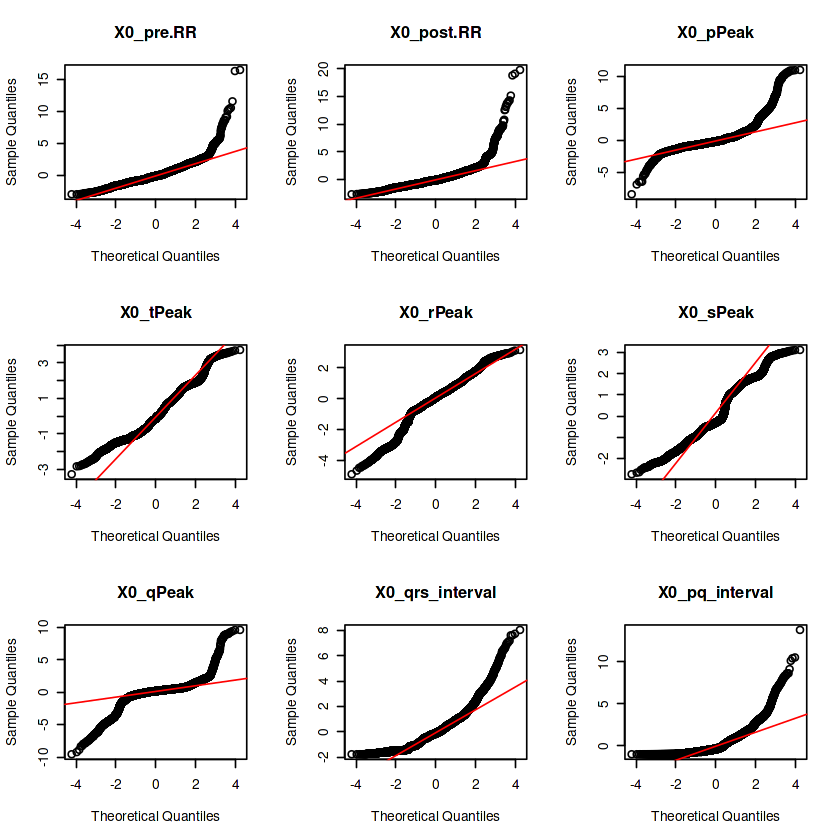

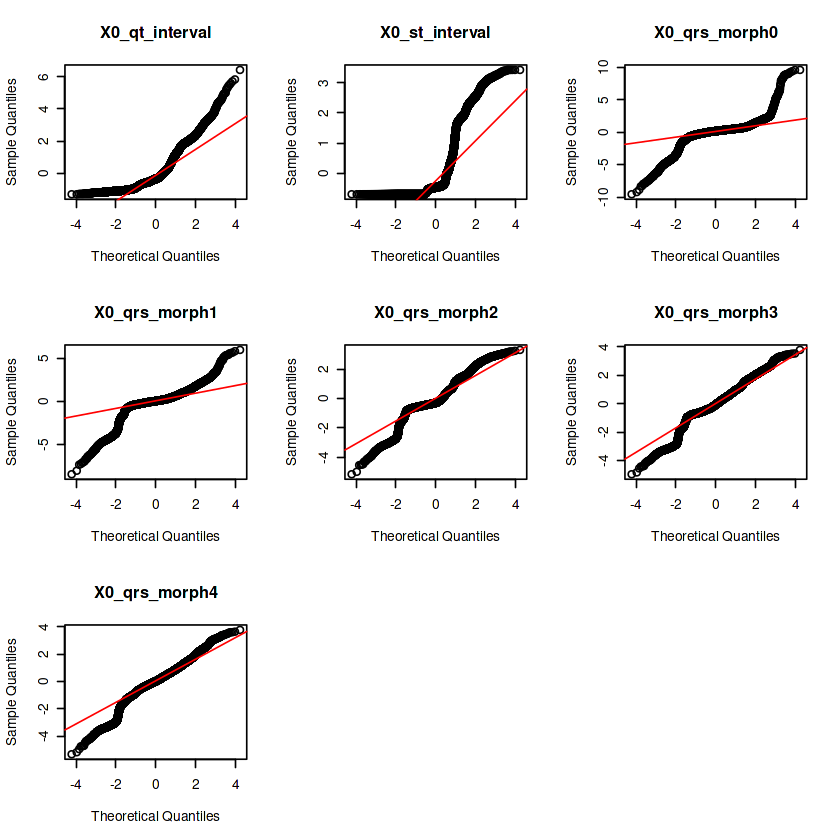

In [31]:
par(mfrow = c(3, 3))  # Grid for multiple plots
for (feature in ecg[1:9]) {  # plot first 9 for example
  qqnorm(trainAD_SMOTE[[feature]], main = feature)
  qqline(trainAD_SMOTE[[feature]], col = "red")
}
par(mfrow = c(3, 3))  # Grid for multiple plots
for (feature in ecg[10:16]) {  # plot first 9 for example
  qqnorm(trainAD_SMOTE[[feature]], main = feature)
  qqline(trainAD_SMOTE[[feature]], col = "red")
}


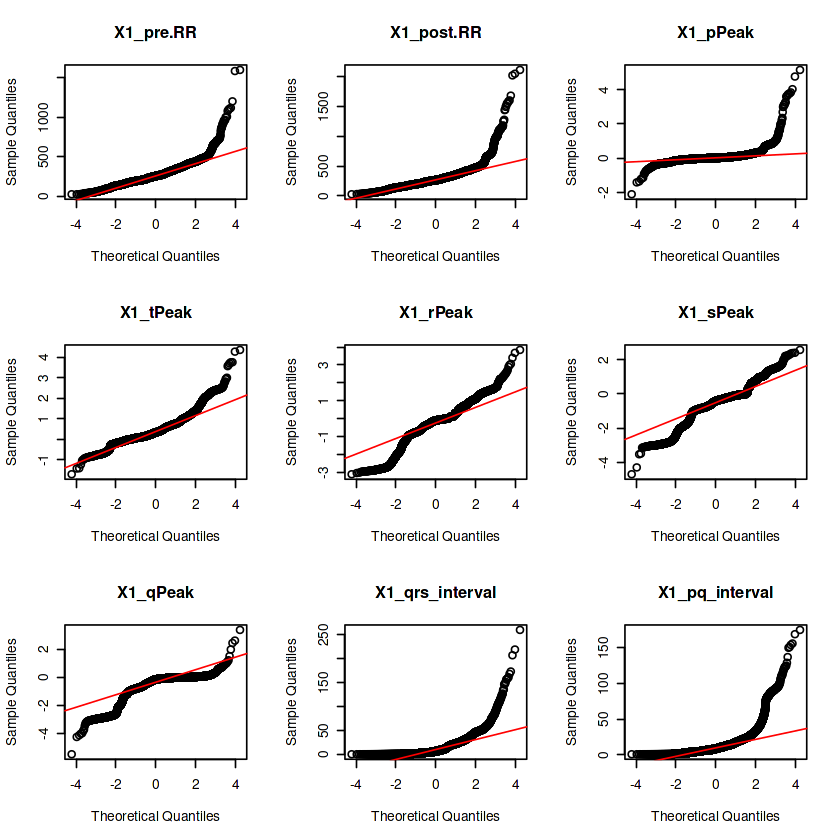

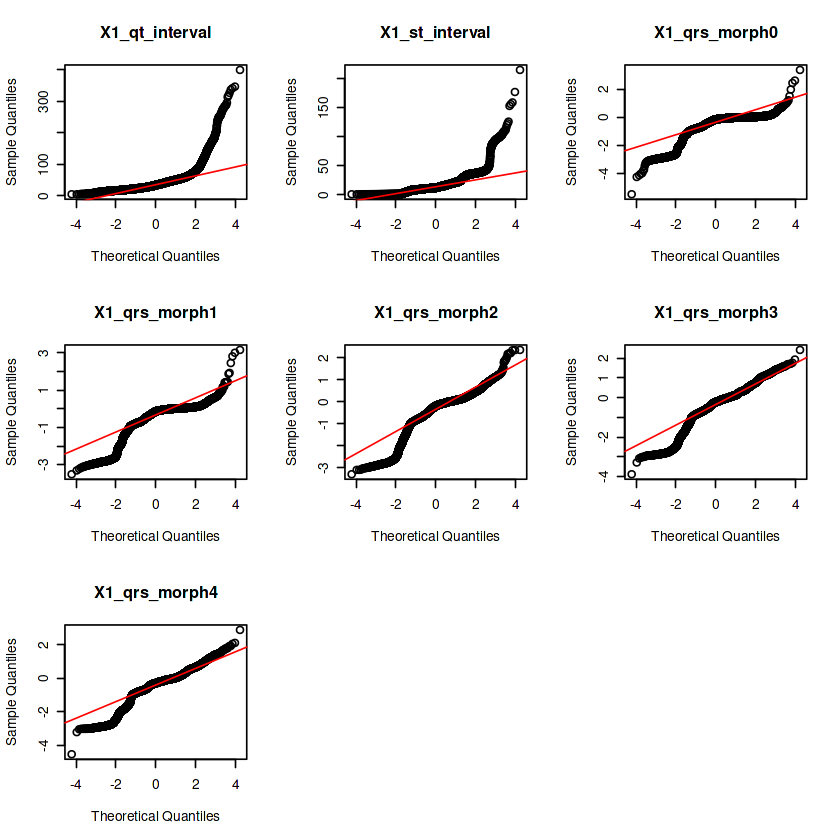

In [69]:
par(mfrow = c(3, 3))  # Grid for multiple plots
for (feature in ecg[17:25]) {  # plot first 9 for example
  qqnorm(trainAD_SMOTE[[feature]], main = feature)
  qqline(trainAD_SMOTE[[feature]], col = "red")
}
par(mfrow = c(3, 3))  # Grid for multiple plots
for (feature in ecg[26:32]) {  # plot first 9 for example
  qqnorm(trainAD_SMOTE[[feature]], main = feature)
  qqline(trainAD_SMOTE[[feature]], col = "red")
}


### Anderson-Darling test for univariate normality

In [59]:
library(nortest)
ad_test_results <- list()
for (i in 1:(ncol(trainAD) - 1)) { 
  feature <- trainAD[[i]]

  if (is.numeric(feature)) {
    ad_test_results[[names(trainAD)[i]]] <- ad.test(feature)
  }
}
ad_test_results

$X0_pre.RR

	Anderson-Darling normality test

data:  feature
A = 204.94, p-value < 2.2e-16


$X0_post.RR

	Anderson-Darling normality test

data:  feature
A = 438.59, p-value < 2.2e-16


$X0_pPeak

	Anderson-Darling normality test

data:  feature
A = 1443.7, p-value < 2.2e-16


$X0_tPeak

	Anderson-Darling normality test

data:  feature
A = 397.43, p-value < 2.2e-16


$X0_rPeak

	Anderson-Darling normality test

data:  feature
A = 559.58, p-value < 2.2e-16


$X0_sPeak

	Anderson-Darling normality test

data:  feature
A = 1098.2, p-value < 2.2e-16


$X0_qPeak

	Anderson-Darling normality test

data:  feature
A = 3298.2, p-value < 2.2e-16


$X0_qrs_interval

	Anderson-Darling normality test

data:  feature
A = 319.05, p-value < 2.2e-16


$X0_pq_interval

	Anderson-Darling normality test

data:  feature
A = 2190.2, p-value < 2.2e-16


$X0_qt_interval

	Anderson-Darling normality test

data:  feature
A = 1771.9, p-value < 2.2e-16


$X0_st_interval

	Anderson-Darling normality test

data:  

## Homoscedasticity check for each Class

In [35]:

library(car)

numeric_vars <- sapply(trainAD, is.numeric)
for (var in names(trainAD_SMOTE)[numeric_vars]) {
  cat("Levene's Test for", var, ":\n")
  print(leveneTest(trainAD_SMOTE[[var]] ~ trainAD_SMOTE$type))
  cat("\n")
}


Levene's Test for X0_post.RR :


ERROR: Error in y - meds[group]: non-conformable arrays


## Transformation (if needed)

In [24]:
# Add 20 units to every numeric feature in trainAD
trainAD_SMOTE[] <- lapply(trainAD_SMOTE, function(x) if(is.numeric(x)) x + 20 else x)


In [25]:
summary(trainAD_SMOTE)

   X0_pre.RR        X0_post.RR        X0_pPeak        X0_tPeak    
 Min.   :  44.0   Min.   :  46.0   Min.   :18.44   Min.   :17.99  
 1st Qu.: 225.0   1st Qu.: 237.0   1st Qu.:19.95   1st Qu.:19.78  
 Median : 276.0   Median : 284.0   Median :20.03   Median :20.30  
 Mean   : 283.9   Mean   : 296.5   Mean   :20.06   Mean   :20.39  
 3rd Qu.: 330.0   3rd Qu.: 341.0   3rd Qu.:20.13   3rd Qu.:20.94  
 Max.   :1622.0   Max.   :2134.0   Max.   :22.18   Max.   :23.12  
    X0_rPeak        X0_sPeak        X0_qPeak     X0_qrs_interval 
 Min.   :17.63   Min.   :16.89   Min.   :17.63   Min.   : 20.00  
 1st Qu.:20.70   1st Qu.:19.11   1st Qu.:19.85   1st Qu.: 38.00  
 Median :21.09   Median :19.46   Median :19.93   Median : 47.00  
 Mean   :21.03   Mean   :19.78   Mean   :19.89   Mean   : 49.04  
 3rd Qu.:21.44   3rd Qu.:20.80   3rd Qu.:19.99   3rd Qu.: 58.00  
 Max.   :23.23   Max.   :23.08   Max.   :22.16   Max.   :181.00  
 X0_pq_interval   X0_qt_interval   X0_st_interval   X0_qrs_morph0  
 

log transformation
it is evident that log transformation/boxcox transformation does not give the ability to achieve normality therefore it is not necessary to use a transformation.

In [26]:
# Apply log transformation to every numeric feature in trainAD
trainAD_SMOTE[] <- lapply(trainAD_SMOTE, function(x) if(is.numeric(x)) log(x) else x)


In [27]:
summary(trainAD_SMOTE)

   X0_pre.RR       X0_post.RR       X0_pPeak        X0_tPeak    
 Min.   :3.784   Min.   :3.829   Min.   :2.914   Min.   :2.890  
 1st Qu.:5.416   1st Qu.:5.468   1st Qu.:2.993   1st Qu.:2.984  
 Median :5.620   Median :5.649   Median :2.997   Median :3.010  
 Mean   :5.609   Mean   :5.649   Mean   :2.999   Mean   :3.014  
 3rd Qu.:5.799   3rd Qu.:5.832   3rd Qu.:3.002   3rd Qu.:3.042  
 Max.   :7.391   Max.   :7.666   Max.   :3.099   Max.   :3.141  
    X0_rPeak        X0_sPeak        X0_qPeak     X0_qrs_interval
 Min.   :2.869   Min.   :2.827   Min.   :2.869   Min.   :2.996  
 1st Qu.:3.030   1st Qu.:2.950   1st Qu.:2.988   1st Qu.:3.638  
 Median :3.049   Median :2.968   Median :2.992   Median :3.850  
 Mean   :3.045   Mean   :2.983   Mean   :2.990   Mean   :3.839  
 3rd Qu.:3.065   3rd Qu.:3.035   3rd Qu.:2.995   3rd Qu.:4.060  
 Max.   :3.145   Max.   :3.139   Max.   :3.098   Max.   :5.198  
 X0_pq_interval  X0_qt_interval  X0_st_interval  X0_qrs_morph0  
 Min.   :3.045   Min.   :

# OUTLIER ANALYSIS

In [76]:
names(trainAD_SMOTE)

[1] "X0_pre.RR"       "X0_post.RR"      "X0_pPeak"        "X0_tPeak"       
 [5] "X0_rPeak"        "X0_sPeak"        "X0_qPeak"        "X0_qrs_interval"
 [9] "X0_pq_interval"  "X0_qt_interval"  "X0_st_interval"  "X0_qrs_morph0"  
[13] "X0_qrs_morph1"   "X0_qrs_morph2"   "X0_qrs_morph3"   "X0_qrs_morph4"  
[17] "X1_pre.RR"       "X1_post.RR"      "X1_pPeak"        "X1_tPeak"       
[21] "X1_rPeak"        "X1_sPeak"        "X1_qPeak"        "X1_qrs_interval"
[25] "X1_pq_interval"  "X1_qt_interval"  "X1_st_interval"  "X1_qrs_morph0"  
[29] "X1_qrs_morph1"   "X1_qrs_morph2"   "X1_qrs_morph3"   "X1_qrs_morph4"  
[33] "type"

In [83]:
trainAD_SMOTE_OUT <- trainAD_SMOTE %>% select(-type,-X1_pre.RR,-X1_post.RR,-X0_qrs_morph0,-X0_qrs_morph1,--X0_qrs_morph2,-X0_qrs_morph3,-X0_qrs_morph4,-X1_qrs_morph0,-X1_qrs_morph1,-X1_qrs_morph2,-X1_qrs_morph3,-X1_qrs_morph4)

In [84]:
# Classical

md <- mahalanobis(trainAD_SMOTE_OUT, 
                  colMeans(trainAD_SMOTE_OUT), 
                  cov(trainAD_SMOTE_OUT))

# Robust
library(rrcov)
mcd <- CovMcd(trainAD_SMOTE_OUT)
robust_md <- mahalanobis(trainAD_SMOTE_OUT, mcd@center, mcd@cov)



Loading required package: robustbase

Scalable Robust Estimators with High Breakdown Point (version 1.7-5)




[1] 0

[1] 6017

integer(0)

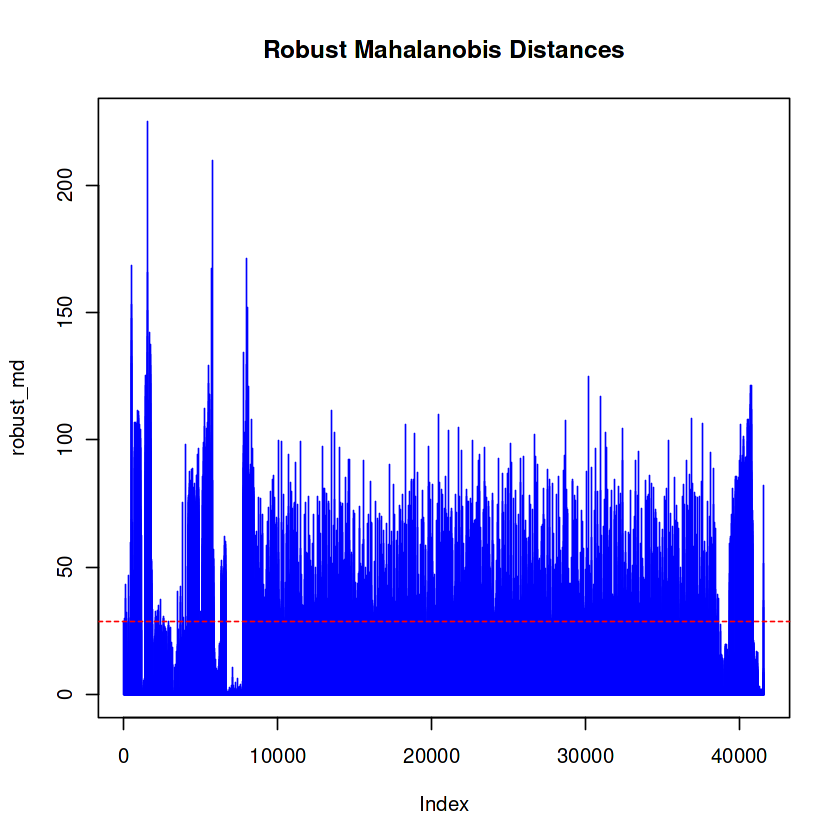

In [87]:
threshold <- qchisq(0.975, df = 16)
outliers_classical <- which(md > threshold)
outliers_robust <- which(robust_md > threshold)
length(outliers_classical)
length(outliers_robust)
intersect(outliers_classical, outliers_robust)


plot(robust_md, type = "h", col = "blue", main = "Robust Mahalanobis Distances")
abline(h = threshold, col = "red", lty = 2)


mahalanobis distance has been check only using first 11 features. dimensionality reduction must be preformed in order to use this by avoiding the singularity in the matrix due to multicollinearity.

**ISOLATION FOREST**

In [93]:
library(solitude)

trainAD_SMOTE_N <- trainAD_SMOTE %>% select(-type)
iso_model <- isolationForest$new()
iso_model$fit(trainAD_SMOTE_N)
preds <- iso_model$predict(trainAD_SMOTE_N)

# Add scores and flags to your data
trainAD_SMOTE_with_outliers <- cbind(trainAD_SMOTE, 
                                     anomaly_score = preds$anomaly_score,
                                     is_outlier = preds$anomaly_score > 0.65)  # 0.65 is a common threshold
outliers <- trainAD_SMOTE_with_outliers[trainAD_SMOTE_with_outliers$is_outlier == TRUE, ]


INFO  [16:51:55.951] Building Isolation Forest ...
INFO  [16:51:56.709] done
INFO  [16:51:56.719] Computing depth of terminal nodes ...
INFO  [16:51:57.010] done
INFO  [16:51:58.428] Completed growing isolation forest


In [95]:
nrow(outliers)

[1] 163

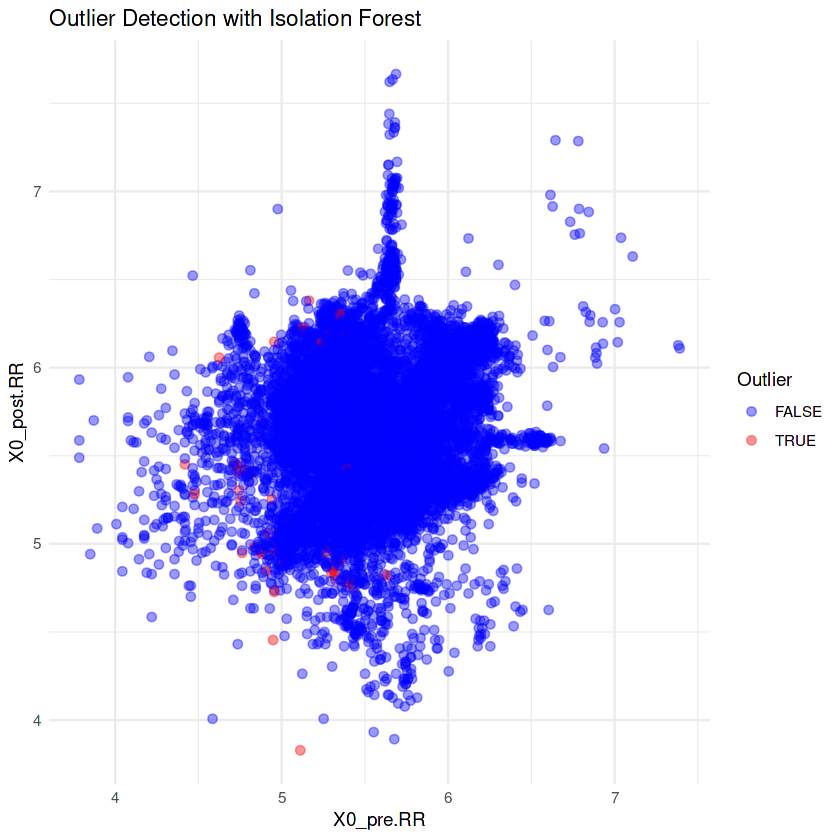

In [98]:
library(ggplot2)

# Extract names of the first two features
feature1 <- names(trainAD_SMOTE_N)[1]
feature2 <- names(trainAD_SMOTE_N)[2]

# Plot using aes_string to reference by column name
ggplot(trainAD_SMOTE_with_outliers, aes_string(x = feature1, y = feature2, color = "is_outlier")) +
  geom_point(alpha = 0.4, size = 2) +
  labs(title = "Outlier Detection with Isolation Forest",
       x = feature1,
       y = feature2,
       color = "Outlier") +
  scale_color_manual(values = c("FALSE" = "blue", "TRUE" = "red")) +
  theme_minimal()


## CLUSTER ANALYSIS

### HDBSCAN 

In [23]:
library(dbscan)
library(dplyr)
set.seed(70000)
# Load your data (replace with actual data)
data <- trainAD %>% select(-type)  

# Apply HDBSCAN (minPts = minimum number of points per cluster)
hdb <- hdbscan(data, minPts = 10)

# View cluster assignments
#print(hdb$cluster)  # -1 indicates noise points


Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram




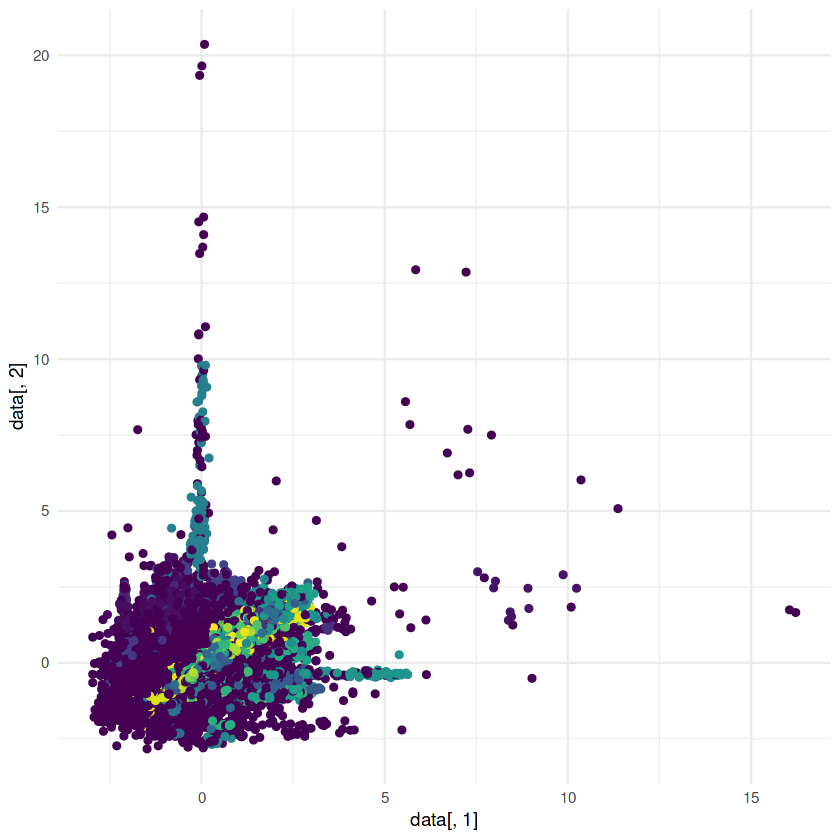

In [25]:
library(ggplot2)

ggplot(data, aes(x = data[,1], y = data[,2], color = as.factor(hdb$cluster))) +
  geom_point() +
  scale_color_viridis_d() +
  theme_minimal() +
  theme(legend.position = "none")  # Remove legend


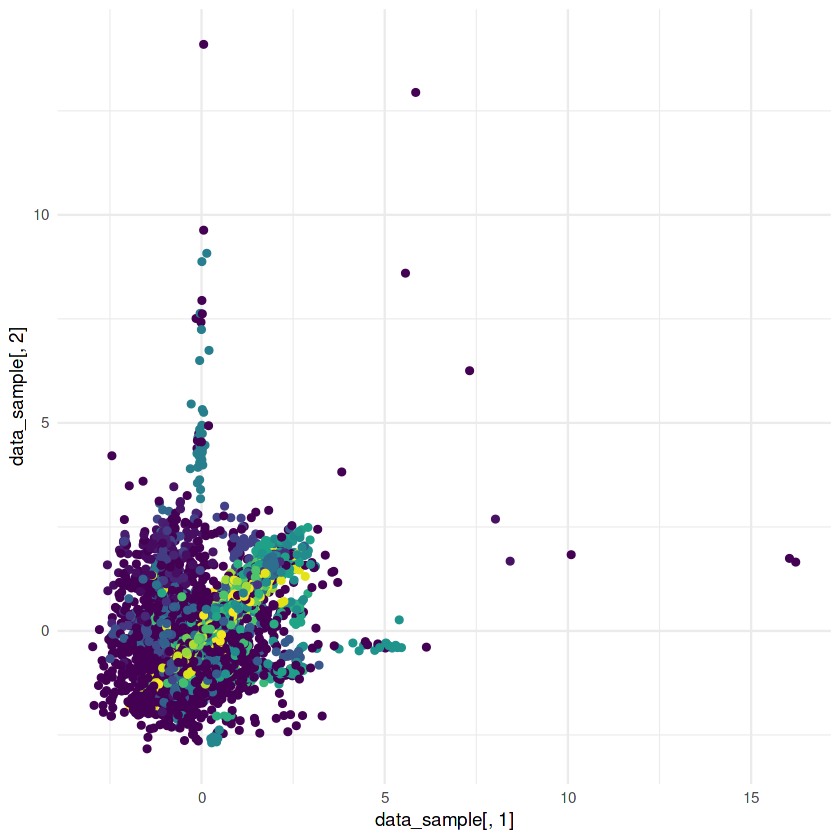

In [28]:
library(ggplot2)

# Take a sample of 100 rows (adjust size as needed)
sample_indices <- sample(nrow(data), size = 10000)
data_sample <- data[sample_indices, ]
cluster_sample <- hdb$cluster[sample_indices]

ggplot(data_sample, aes(x = data_sample[,1], y = data_sample[,2], color = as.factor(cluster_sample))) +
  geom_point() +
  scale_color_viridis_d() +
  theme_minimal() +
  theme(legend.position = "none")


# K MEANS CLUSTERING

In [84]:
trainAD_SMOTE_KM <- trainAD_SMOTE
trainAD_SMOTE_KM <- trainAD_SMOTE_KM %>% select(-type)
# Scale it
scaled_df <- scale(trainAD_SMOTE_KM)

# K-means clustering (e.g., k = 3)
set.seed(123)
kmeans_result <- kmeans(scaled_df, centers = 3, nstart = 25)

# Add cluster labels
trainAD_SMOTE_KM$cluster <- kmeans_result$cluster


[1] 0.24948


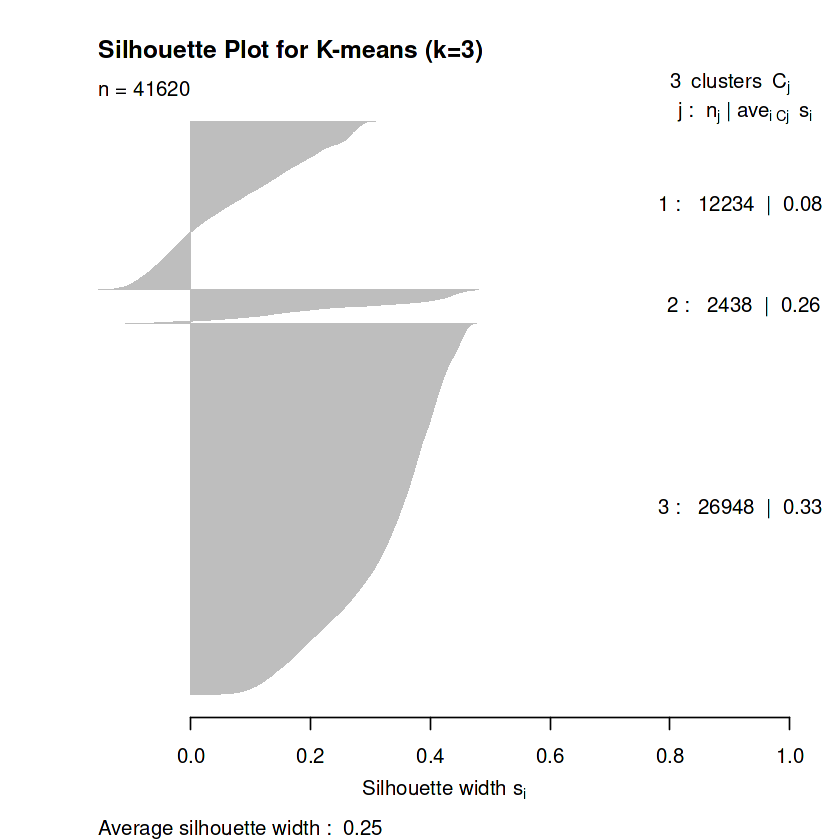

In [85]:
# Load library
library(cluster)

# Compute distance matrix
dist_matrix <- dist(scaled_df)

# Compute silhouette score
sil <- silhouette(kmeans_result$cluster, dist_matrix)

# Average silhouette width
mean_silhouette <- mean(sil[, 3])
print(mean_silhouette)

# Optional: plot silhouette
plot(sil, border = NA, main = "Silhouette Plot for K-means (k=3)")


# Hierachichal Clustering 

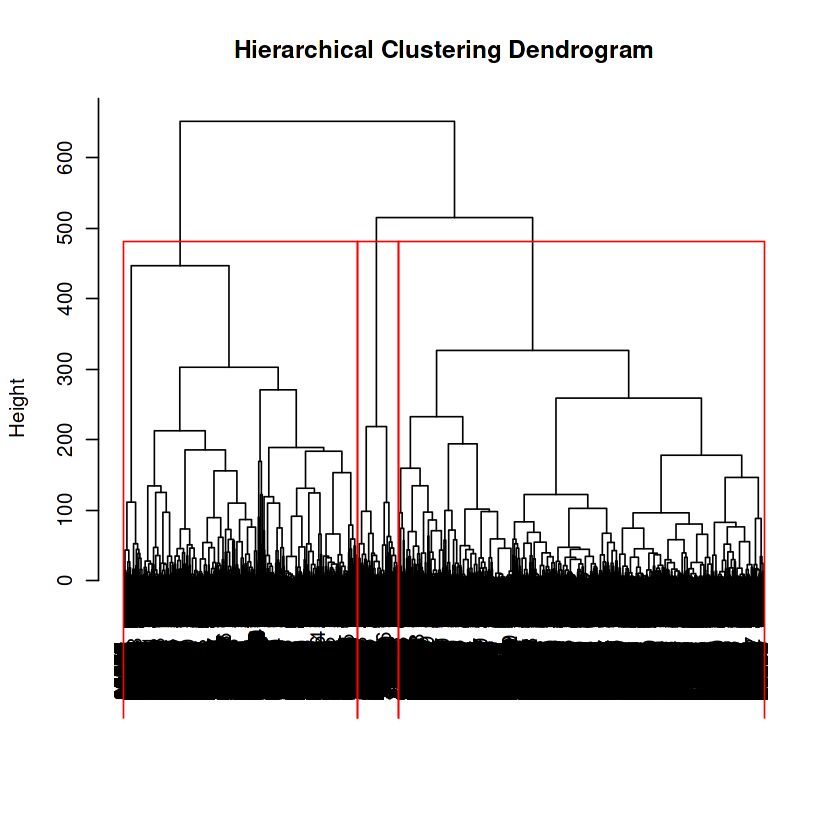

In [70]:
trainAD_SMOTE_hC <- trainAD_SMOTE %>% select(-type)
scaled_data <- scale(trainAD_SMOTE_hC)

dist_matrix <- dist(scaled_data, method = "euclidean")  # can also try "manhattan"

hc <- hclust(dist_matrix, method = "ward.D2")  # try "complete", "average", etc.

plot(hc, main = "Hierarchical Clustering Dendrogram", xlab = "", sub = "")

rect.hclust(hc, k = 3, border = "red")

clusters <- cutree(hc, k = 3)

In [71]:
trainAD_SMOTE_hC$cluster <- clusters

head(trainAD_SMOTE_hC)

X0_pre.RR,X0_post.RR,X0_pPeak,X0_tPeak,X0_rPeak,X0_sPeak,X0_qPeak,X0_qrs_interval,X0_pq_interval,X0_qt_interval,⋯,X1_qrs_interval,X1_pq_interval,X1_qt_interval,X1_st_interval,X1_qrs_morph0,X1_qrs_morph1,X1_qrs_morph2,X1_qrs_morph3,X1_qrs_morph4,cluster
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
333,414,0.035873279,-0.3511591,1.2956461,-0.4011333,0.002740405,23,5,35,⋯,16,3,27,8,0.023874691,0.025494890,0.02914638,0.022849421,-0.007688841,1
237,459,-0.005416773,-0.3034790,1.3554760,-0.3237708,-0.105281727,22,8,34,⋯,33,5,44,6,-0.005573809,-0.005131799,0.01161326,0.025869823,0.018328779,1
200,178,-0.398769719,0.3578392,1.0616308,-1.4132657,-0.402472309,69,4,113,⋯,24,11,48,13,-0.019968118,-0.008899556,0.05846644,0.015177701,-0.575896076,1
178,431,0.769754414,0.7800578,0.9428202,-1.3790416,-0.559470797,58,41,182,⋯,5,16,27,6,-0.471488928,-0.468374074,-0.45488674,-0.430995046,-0.397195567,2
177,167,0.486703232,0.3871179,0.8054910,-1.5706195,-0.344385204,53,46,133,⋯,21,3,36,12,0.012864534,0.027764333,0.08247514,-0.003548989,-0.458494381,2
167,485,0.766436873,0.7554893,0.7755237,-1.2683467,-0.455302548,58,41,188,⋯,0,19,31,12,-0.513340659,-0.513340659,-0.51334066,-0.513340659,-0.513340659,2


In [82]:
library(cluster)
sil <- silhouette(clusters, dist_matrix)

# Convert silhouette object to data frame
sil_df <- as.data.frame(sil)

# Mean silhouette width per cluster
aggregate(sil_width ~ cluster, data = sil_df, mean)

cluster,sil_width
<dbl>,<dbl>
1,0.33542594
2,0.02848027
3,0.25757576


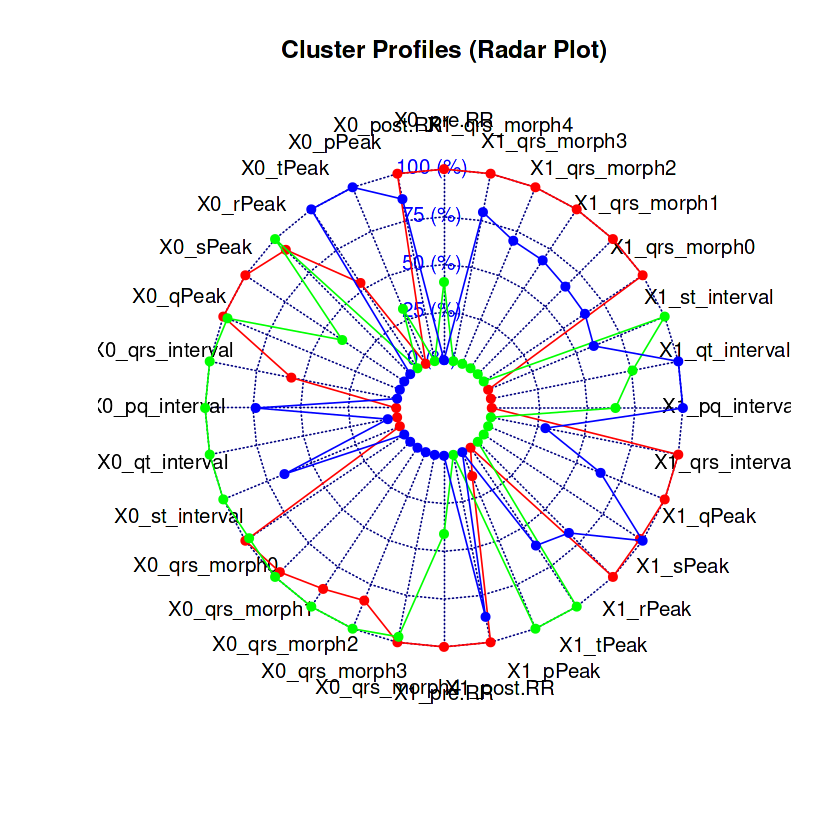

In [72]:
library(fmsb)

# Prepare data for radar chart (mean of scaled variables by cluster)
radar_data <- trainAD_SMOTE_hC %>%
  group_by(cluster) %>%
  summarise(across(where(is.numeric), mean)) %>%
  column_to_rownames("cluster")

# Normalize between 0 and 1
radar_scaled <- as.data.frame(lapply(radar_data, function(x) (x - min(x)) / (max(x) - min(x))))
radar_scaled <- rbind(rep(1, ncol(radar_scaled)), rep(0, ncol(radar_scaled)), radar_scaled)

# Plot
radarchart(radar_scaled, axistype = 1,
           pcol = c("red", "green", "blue"), plty = 1,
           title = "Cluster Profiles (Radar Plot)")


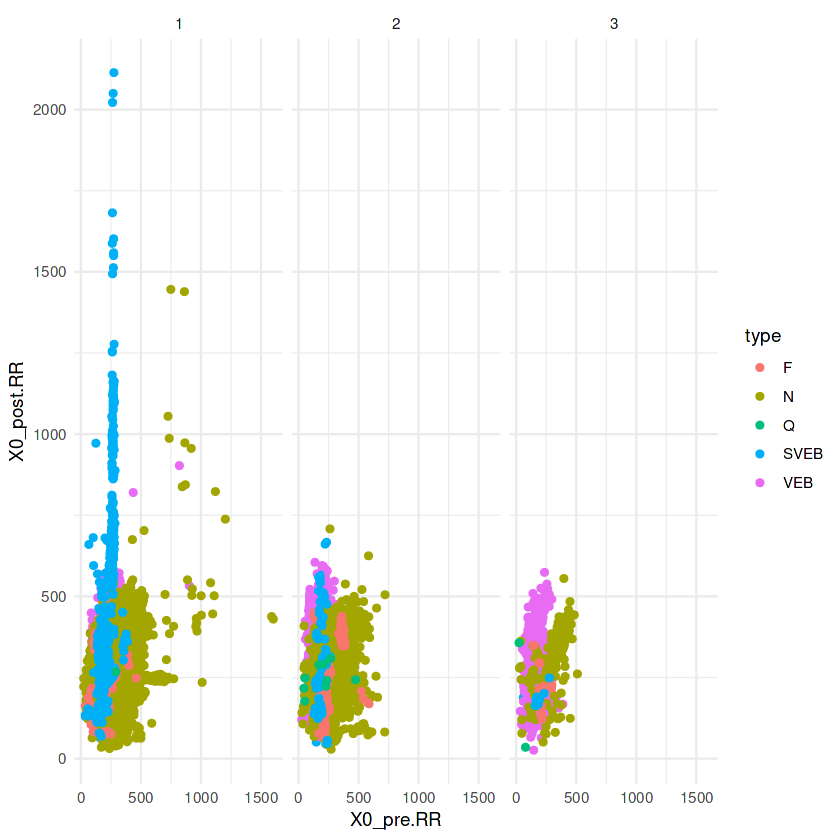

In [80]:
trainAD_SMOTE_hC$type <- trainAD$type

ggplot(trainAD_SMOTE_hC, aes(x = X0_pre.RR, y = X0_post.RR)) +
  geom_point(aes(color = type)) +
  facet_wrap(~ cluster, nrow = 3, ncol = 3) +
  theme_minimal()

## FACTOR ANALYSIS

In [28]:
library(FactoMineR)
library(factoextra)


# Perform Factor Analysis for Mixed Data (FAMD)
famd_result <- FAMD(trainAD_SMOTE)



Warning message:
“ggrepel: 41615 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 41615 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


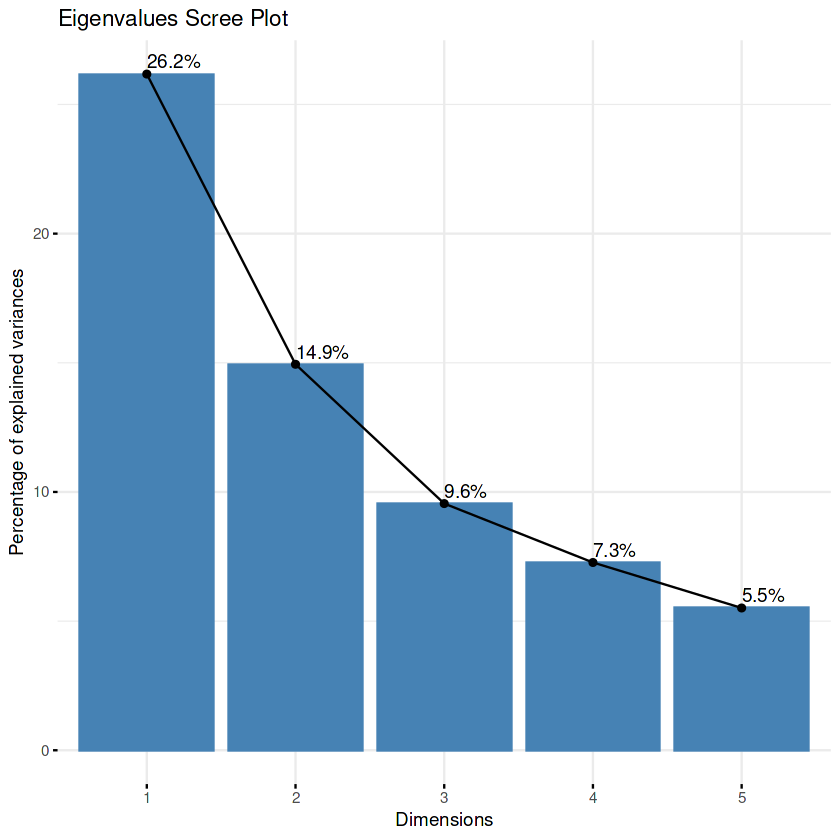

In [29]:
fviz_screeplot(famd_result, addlabels = TRUE, title = "Eigenvalues Scree Plot")

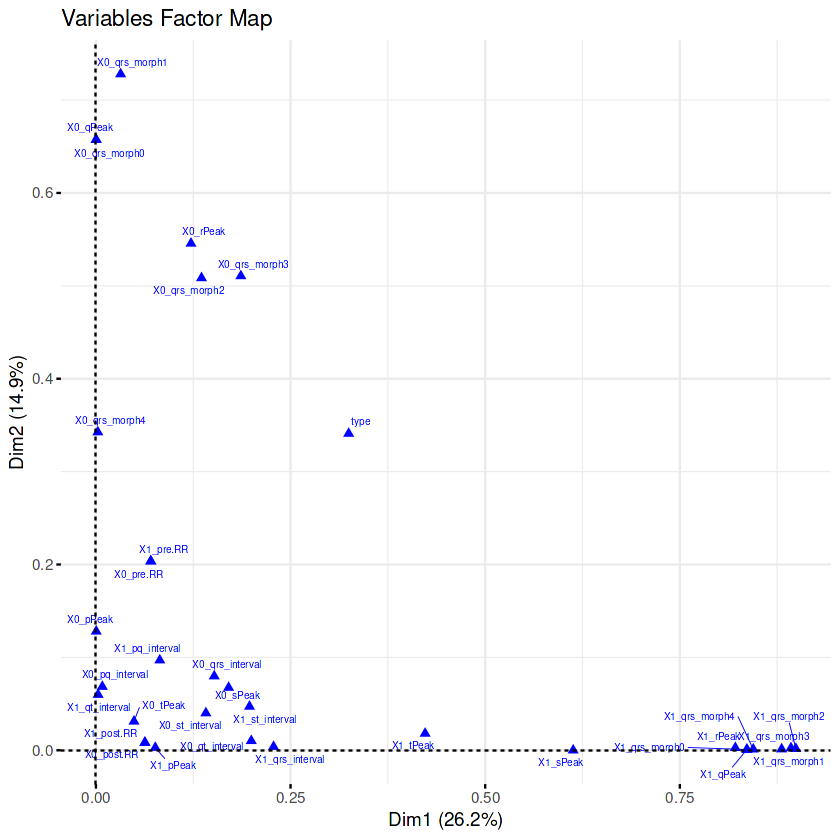

In [30]:
fviz_famd_var(
  famd_result, 
  title = "Variables Factor Map",
  labelsize = 2,      # Adjusts the size of variable labels
  pointsize = 2,      # Controls the size of points
  repel = TRUE,       # Avoids label overlap
  col.var = "blue",   # Changes the color of variables
  alpha.var = 1     # Adjusts transparency of points
)


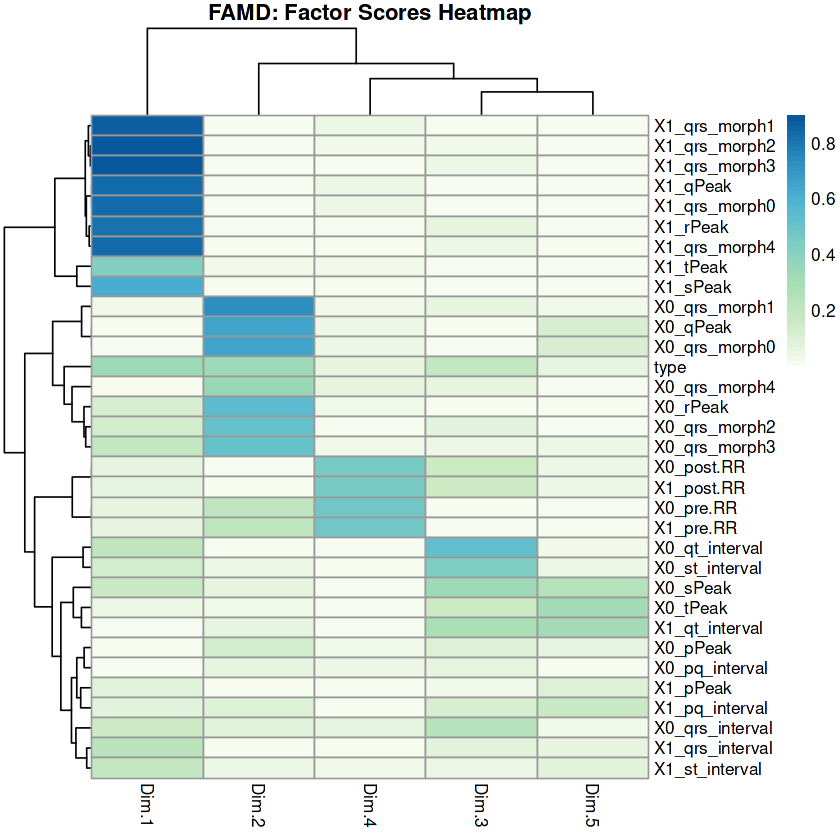

In [31]:
library(pheatmap)

individuals_famd <- famd_result$ind$coord

variables_famd <- famd_result$var$coord

library(pheatmap)

pheatmap(variables_famd, 
         main = "FAMD: Factor Scores Heatmap", 
         clustering_distance_rows = "euclidean", 
         clustering_distance_cols = "euclidean", 
         clustering_method = "complete", 
         scale = "none", 
         color = colorRampPalette(c("#f7fcf0", "#ccebc5", "#a8ddb5", "#7bccc4", "#4eb3d3", "#2b8cbe", "#08589e"))(50))  # Softer greens & blues

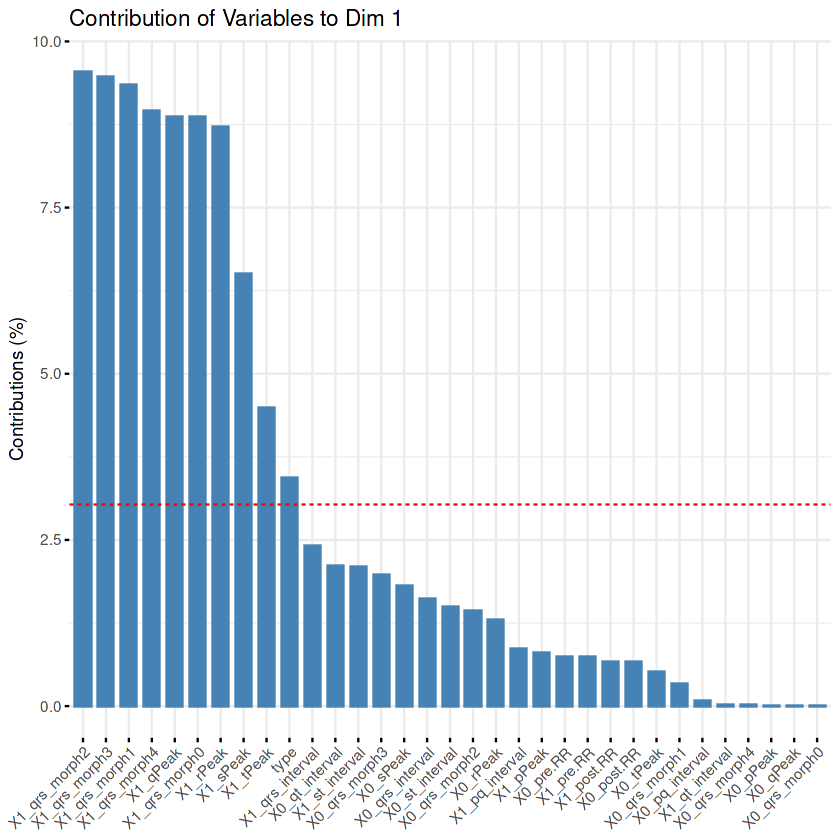

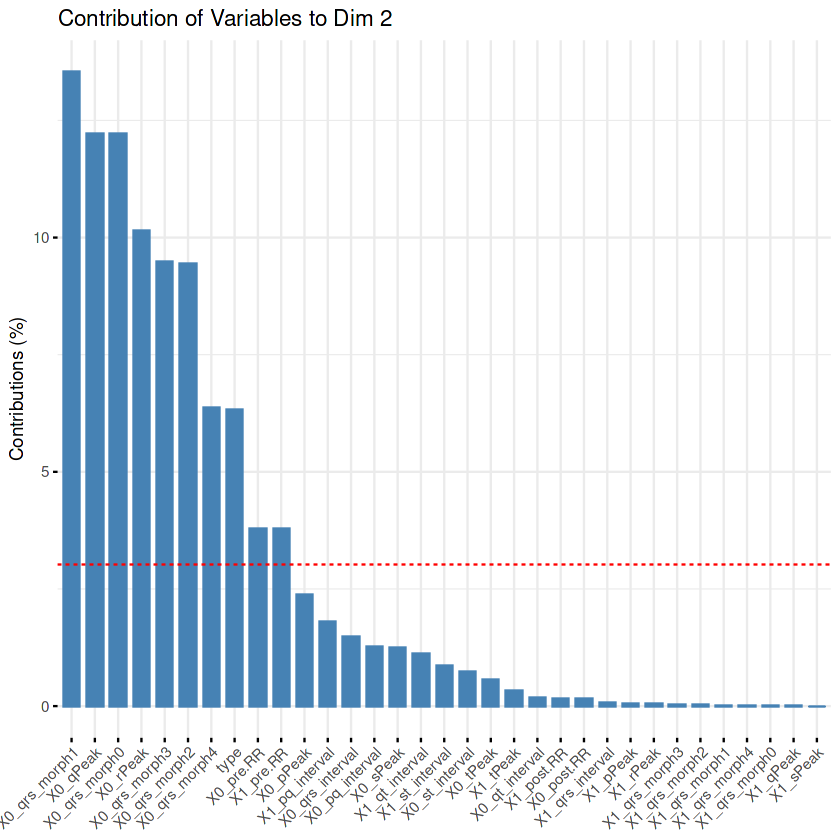

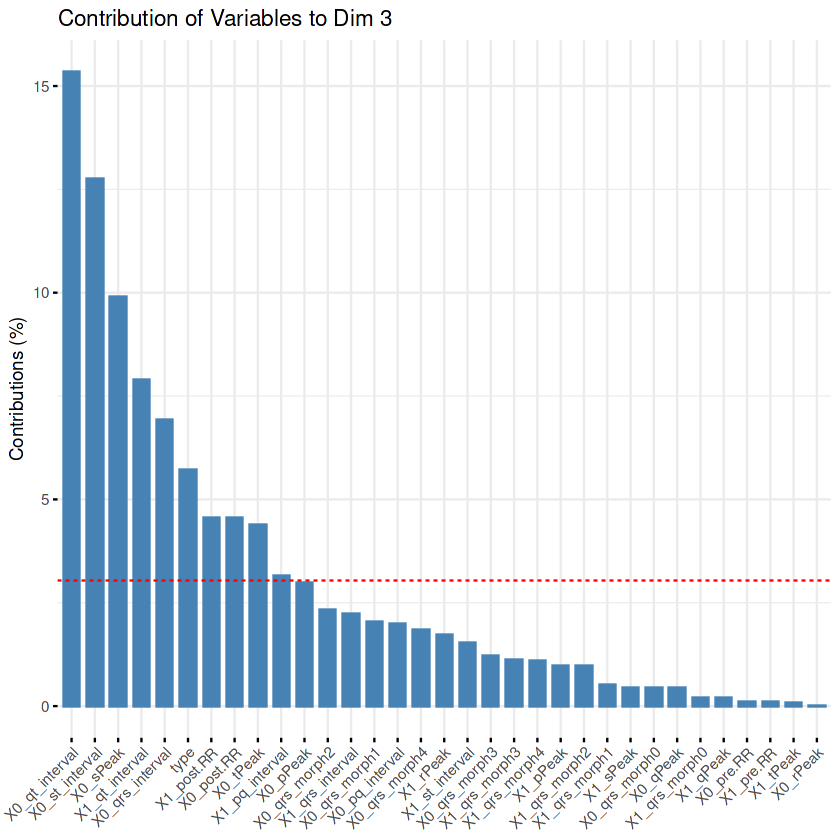

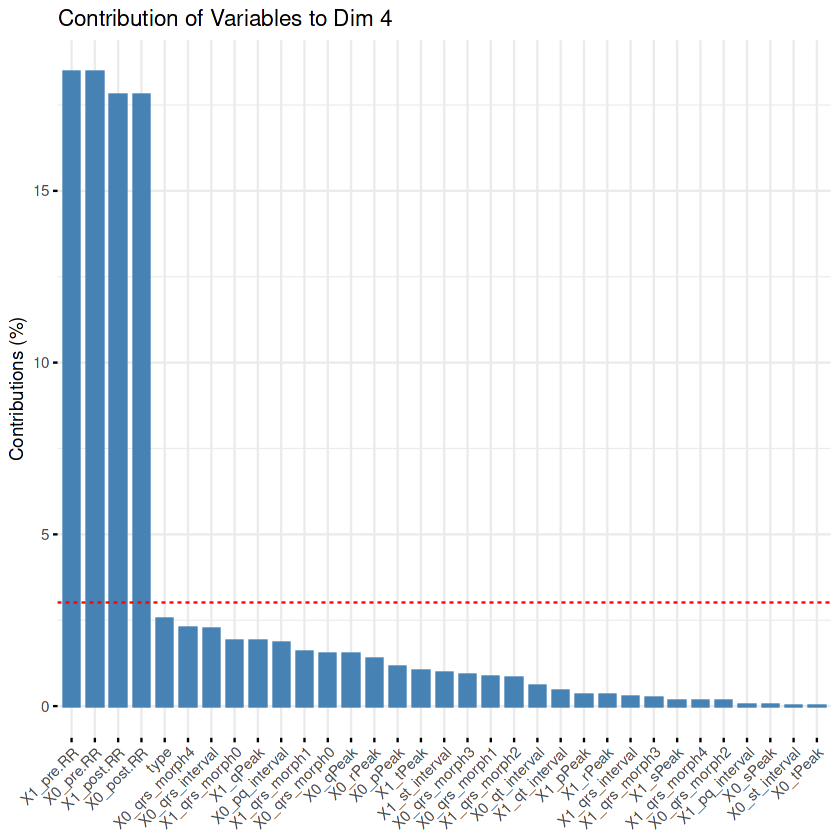

In [32]:
fviz_contrib(famd_result, choice = "var", axes = 1, title = "Contribution of Variables to Dim 1")
fviz_contrib(famd_result, choice = "var", axes = 2, title = "Contribution of Variables to Dim 2")
fviz_contrib(famd_result, choice = "var", axes = 3, title = "Contribution of Variables to Dim 3")
fviz_contrib(famd_result, choice = "var", axes = 4, title = "Contribution of Variables to Dim 4")

varimax rotated factors

In [33]:
library(GPArotation)

# Extract FAMD loadings
loadings <- famd_result$var$coord

# Apply varimax rotation
rotated_loadings <- varimax(loadings)$loadings

# Print rotated factors
print(rotated_loadings)



Loadings:
                Dim.1  Dim.2  Dim.3  Dim.4  Dim.5 
X0_pre.RR               0.193         0.488       
X0_post.RR                     0.111  0.477       
X0_pPeak                0.128                     
X0_tPeak                                     0.342
X0_rPeak                0.549                     
X0_sPeak         0.136         0.265         0.335
X0_qPeak                0.656                0.104
X0_qrs_interval  0.129         0.223         0.104
X0_pq_interval                                    
X0_qt_interval   0.158         0.504         0.192
X0_st_interval   0.105         0.416         0.167
X0_qrs_morph0           0.656                0.104
X0_qrs_morph1           0.728                     
X0_qrs_morph2    0.106  0.514                     
X0_qrs_morph3    0.158  0.518                     
X0_qrs_morph4           0.341                     
X1_pre.RR               0.193         0.488       
X1_post.RR                     0.111  0.477       
X1_pPeak            

## Principal Component Analysis

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.9856 2.1910 1.8211 1.60526 1.42617 1.34762 1.16911
Proportion of Variance 0.2786 0.1500 0.1036 0.08053 0.06356 0.05675 0.04271
Cumulative Proportion  0.2786 0.4286 0.5322 0.61274 0.67630 0.73305 0.77576
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.05081 1.01574 0.99050 0.89211 0.85541 0.77605 0.70908
Proportion of Variance 0.03451 0.03224 0.03066 0.02487 0.02287 0.01882 0.01571
Cumulative Proportion  0.81027 0.84251 0.87317 0.89804 0.92091 0.93973 0.95544
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.63087 0.51449 0.48892 0.35956 0.32568 0.29640 0.25859
Proportion of Variance 0.01244 0.00827 0.00747 0.00404 0.00331 0.00275 0.00209
Cumulative Proportion  0.96788 0.97615 0.98362 0.98766 0.99097 0.99372 0.99581
                          PC22    PC23

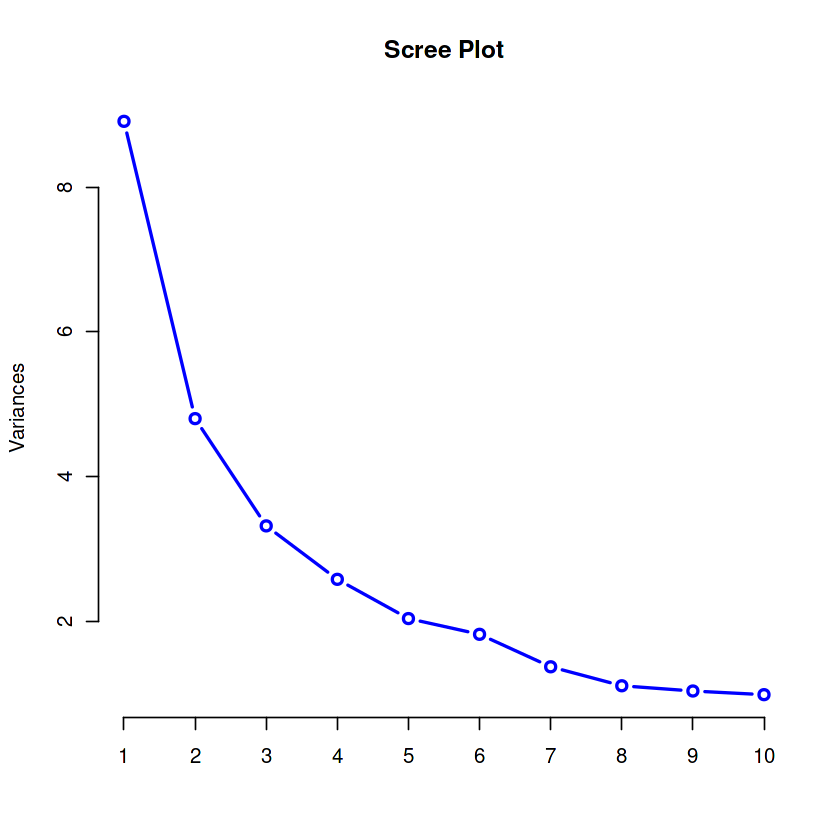

In [27]:
trainAD_pca <- trainAD %>% select(-type)
pca_result <- prcomp(trainAD_pca, center = TRUE, scale. = TRUE)

summary(pca_result)

screeplot(pca_result, main = "Scree Plot", type = "lines", col = "blue", lwd = 2)


In [28]:
# Get loadings for the first 10 PCs
loadings_10pc <- pca_result$rotation[, 1:10]

# View them
print(loadings_10pc)


                         PC1          PC2         PC3           PC4
X0_pre.RR       -0.087511987  0.173383344 -0.02747259  0.4408676396
X0_post.RR      -0.075565555  0.060552647 -0.21175802  0.4363003379
X0_pPeak        -0.007774626 -0.133979905 -0.19203662 -0.1072487025
X0_tPeak        -0.075352775 -0.085018355  0.16966148  0.0224121568
X0_rPeak         0.125043522  0.325537526  0.06074813 -0.1075656861
X0_sPeak        -0.133919346  0.089821787  0.30672283  0.0003747248
X0_qPeak         0.002093701  0.382194799 -0.01448981 -0.0922275034
X0_qrs_interval  0.126731406  0.088215790 -0.25216650 -0.1489965360
X0_pq_interval   0.027730797 -0.103143949 -0.17071298 -0.1543204290
X0_qt_interval   0.140954978 -0.005719932 -0.39421222 -0.1077142475
X0_st_interval   0.119831897 -0.021756630 -0.35984736 -0.0186970565
X0_qrs_morph0    0.002093701  0.382194799 -0.01448981 -0.0922275034
X0_qrs_morph1    0.068724284  0.404510059 -0.09019567 -0.0695069364
X0_qrs_morph2    0.131104238  0.331897530 -0.103

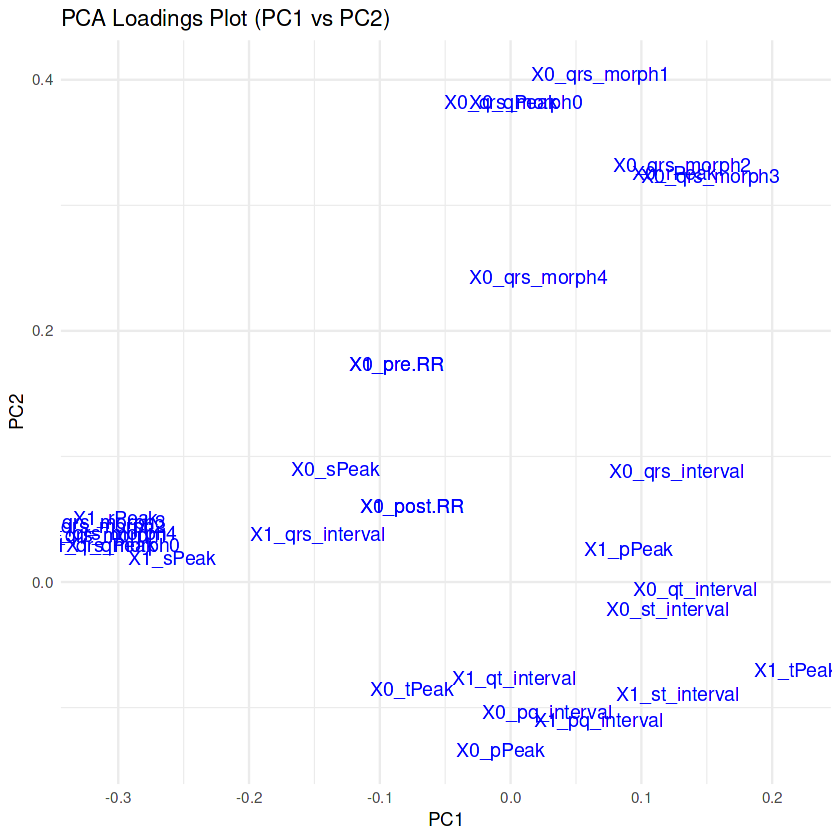

In [29]:
# PCA loadings plot (showing the contribution of original variables to PC1 and PC2)
loadings <- pca_result$rotation[, 1:2] 
# Convert loadings to data frame for ggplot
loadings_df <- as.data.frame(loadings)
loadings_df$Variable <- rownames(loadings_df)


library(ggplot2)
ggplot(loadings_df, aes(x = PC1, y = PC2, label = Variable)) +
  geom_text(size = 4, hjust = 0.5, vjust = 0.5, color = "blue") +
  labs(title = "PCA Loadings Plot (PC1 vs PC2)", x = "PC1", y = "PC2") +
  theme_minimal()


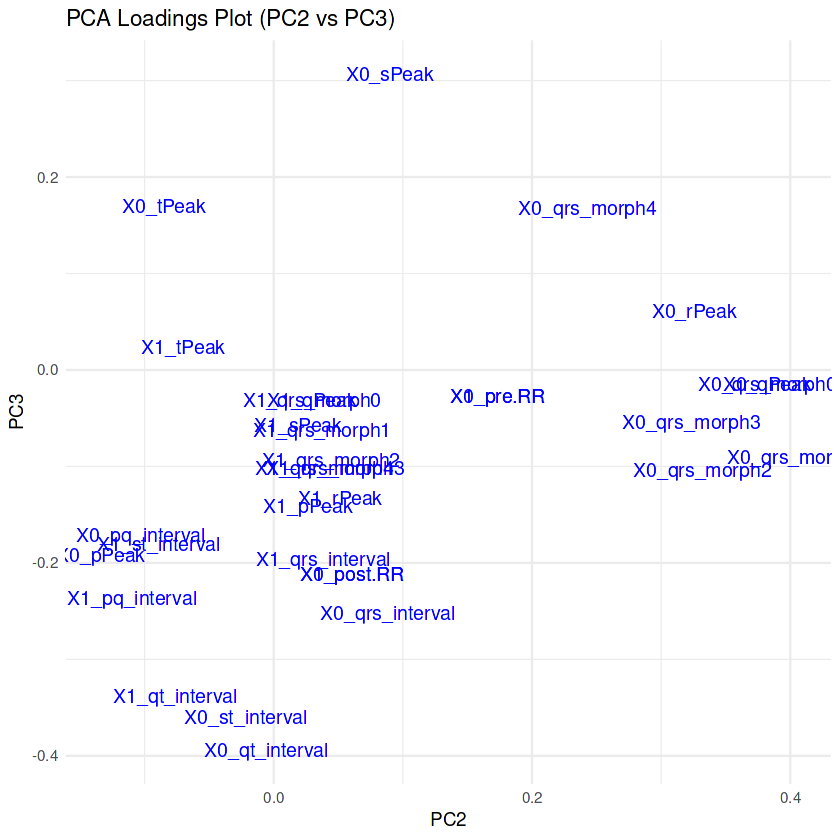

In [30]:
loadings <- pca_result$rotation[, 2:3] 
loadings_df <- as.data.frame(loadings)
loadings_df$Variable <- rownames(loadings_df)


library(ggplot2)
ggplot(loadings_df, aes(x = PC2, y = PC3, label = Variable)) +
  geom_text(size = 4, hjust = 0.5, vjust = 0.5, color = "blue") +
  labs(title = "PCA Loadings Plot (PC2 vs PC3)", x = "PC2", y = "PC3") +
  theme_minimal()

# ADVANCED ANALYSIS

# Mixture Disciminant Analysis

In [31]:

library(mda)

# Assuming trainAD is a data frame with the response variable and predictors
# Let's say 'response' is the class variable and the other columns are predictors

# Fit the mixture discriminant analysis model
MDAmodel <- mda(type ~ ., data = trainAD)

# View the model summary
summary(MDAmodel)

# Predict the class for the training data
predictions <- predict(MDAmodel, trainAD)

# If you want to check the accuracy or evaluate performance
table(predictions, trainAD$response)

# Optionally, you can use cross-validation or other techniques for better evaluation


Loading required package: class

Loaded mda 0.5-4



Attaching package: ‘mda’


The following object is masked from ‘package:parsnip’:

    mars




                  Length Class   Mode   
percent.explained  14    -none-  numeric
values             14    -none-  numeric
means             210    -none-  numeric
theta.mod         196    -none-  numeric
dimension           1    -none-  numeric
sub.prior           5    -none-  list   
fit                 4    polyreg list   
call                3    -none-  call   
weights             5    -none-  list   
prior               5    table   numeric
assign.theta        5    -none-  list   
deviance            1    -none-  numeric
confusion          25    table   numeric
terms               3    terms   call   

ERROR: Error in maxdist[l] <- x[l, i]: NAs are not allowed in subscripted assignments


## RF MODEL - For SMOTE 2

Growing trees.. Progress: 52%. Estimated remaining time: 28 seconds.
Growing trees.. Progress: 40%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 80%. Estimated remaining time: 15 seconds.
Growing trees.. Progress: 51%. Estimated remaining time: 29 seconds.
Growing trees.. Progress: 39%. Estimated remaining time: 48 seconds.
Growing trees.. Progress: 79%. Estimated remaining time: 16 seconds.
Growing trees.. Progress: 52%. Estimated remaining time: 28 seconds.
Growing trees.. Progress: 38%. Estimated remaining time: 50 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 18 seconds.
Growing trees.. Progress: 52%. Estimated remaining time: 28 seconds.
Growing trees.. Progress: 39%. Estimated remaining time: 48 seconds.
Growing trees.. Progress: 76%. Estimated remaining time: 20 seconds.
Growing trees.. Progress: 51%. Estimated remaining time: 29 seconds.
Growing trees.. Progress: 38%. Estimated remaining time: 50 seconds.
Growing trees.. Progress: 77%. Est

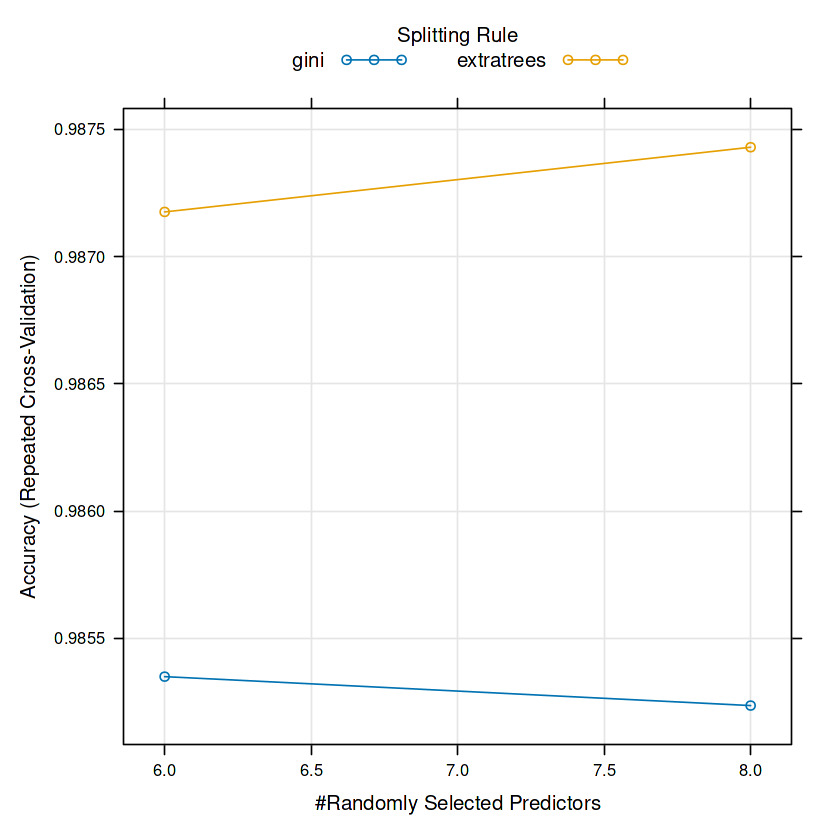

Confusion Matrix and Statistics

          Reference
Prediction     F     N     Q  SVEB   VEB
      F      111    12     0     0     1
      N       15 17652     1    55     9
      Q        0     0     0     0     0
      SVEB     0   167     0   463     2
      VEB     34   185     2    37  1389

Overall Statistics
                                          
               Accuracy : 0.9742          
                 95% CI : (0.9719, 0.9763)
    No Information Rate : 0.8948          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8743          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: F Class: N Class: Q Class: SVEB Class: VEB
Sensitivity          0.693750   0.9798 0.000000     0.83423    0.99143
Specificity          0.999349   0.9622 1.000000     0.99137    0.98623
Pos Pred Value       0.895161   0.9955      NaN     0.7325

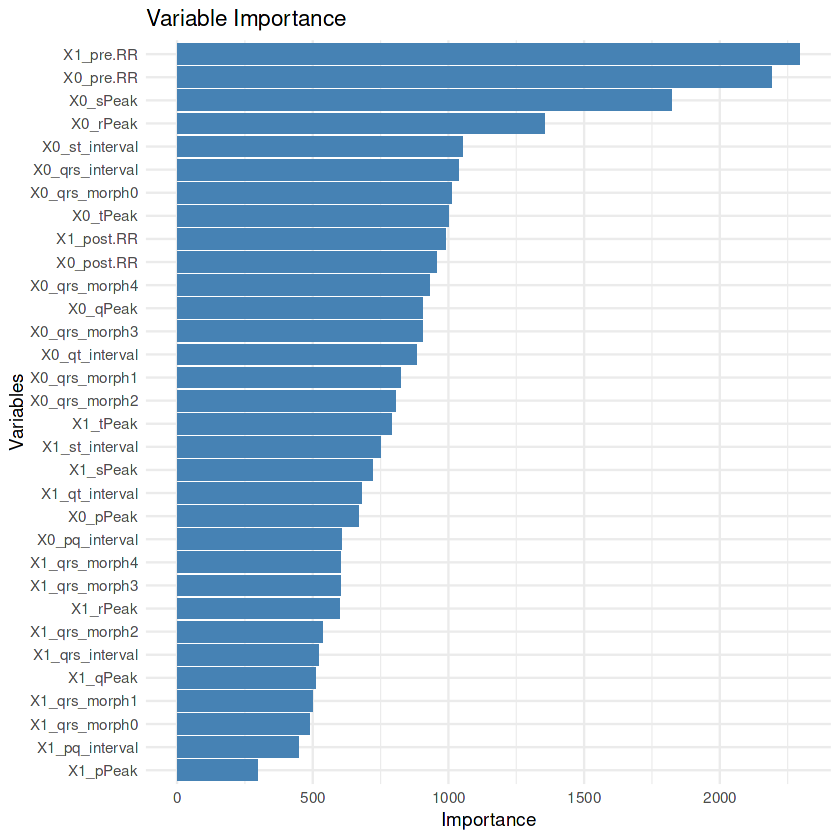

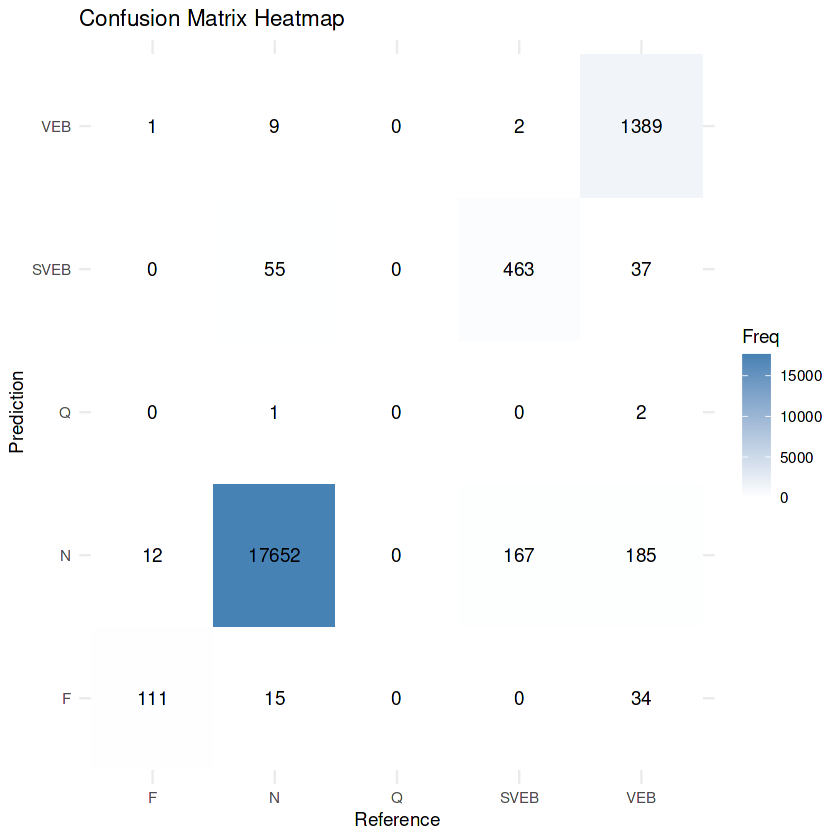

In [25]:
# Load required libraries
library(randomForest)
library(caret)
library(ggplot2)

# Set seed for reproducibility
set.seed(95000)

trainAD_RF <- trainAD_SMOTE2 # This is done to reduce the complexity of changing the variable names repeatedly. use as desire.

# Ensure Type variable is a factor
trainAD_RF$type <- as.factor(trainAD_RF$type)
testAD$type <- as.factor(testAD$type)

# Define the training control
# Using 10-fold cross-validation, repeated 3 times
ctrl <- trainControl(
  method = "repeatedcv",
  number = 10,
  repeats = 3,
  classProbs = TRUE,
  savePredictions = "final"
)

# Define the parameter grid
# mtry: Number of variables randomly sampled as candidates at each split
# min.node.size: Minimum size of terminal nodes
# splitrule: Rule used to split nodes
rf_grid <- expand.grid(
  mtry = c(6,8),
  min.node.size = c(1),
  splitrule = c("gini","extratrees")
)

# Train the model with cross-validation and grid search
# Note: The ranger implementation of Random Forest is used by caret for grid search
rf_tuned1 <- train(
  type ~ .,
  data = trainAD_RF,
  method = "ranger",
  num.trees = 500,
  importance = "impurity",
  tuneGrid = rf_grid,
  trControl = ctrl,
  metric = "Accuracy"
)

# Display results
print(rf_tuned1)
print(rf_tuned1$bestTune)

# Plot the results
plot(rf_tuned1)

# Get the best model
best_model <- rf_tuned1$finalModel

# Variable importance
var_importance <- ranger::importance(best_model)
var_imp_df <- data.frame(
  Variable = names(var_importance),
  Importance = var_importance
)
var_imp_df <- var_imp_df[order(-var_imp_df$Importance),]

# Plot variable importance
ggplot(var_imp_df, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  theme_minimal() +
  labs(x = "Variables", y = "Importance", title = "Variable Importance")

# Make predictions on test data using the best model
predictions <- predict(rf_tuned1, testAD)

# Create confusion matrix
cm <- confusionMatrix(predictions, testAD$type)
print(cm)

# Calculate and print additional performance metrics
accuracy <- cm$overall["Accuracy"]
precision <- cm$byClass["Pos Pred Value"]
recall <- cm$byClass["Sensitivity"]
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("\nPerformance Metrics:\n")
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

# For multi-class problems, we can create a confusion matrix visualization
# This gives a better view of classification performance for multiple classes
if(require(ggplot2)) {
  # Convert confusion matrix to a data frame for plotting
  cm_df <- as.data.frame(cm$table)
  colnames(cm_df) <- c("Reference", "Prediction", "Freq")
  
  # Create a heatmap of the confusion matrix
  ggplot(cm_df, aes(x = Reference, y = Prediction, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_gradient(low = "white", high = "steelblue") +
    theme_minimal() +
    labs(title = "Confusion Matrix Heatmap")
}



Direct Test Accuracy Calculation:
Correct predictions: 19615 out of 20135 
Test Accuracy: 97.42 %

Confusion Matrix and Statistics

          Reference
Prediction     F     N     Q  SVEB   VEB
      F      111    12     0     0     1
      N       15 17652     1    55     9
      Q        0     0     0     0     0
      SVEB     0   167     0   463     2
      VEB     34   185     2    37  1389

Overall Statistics
                                          
               Accuracy : 0.9742          
                 95% CI : (0.9719, 0.9763)
    No Information Rate : 0.8948          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8743          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: F Class: N Class: Q Class: SVEB Class: VEB
Sensitivity          0.693750   0.9798 0.000000     0.83423    0.99143
Specificity          0.999349

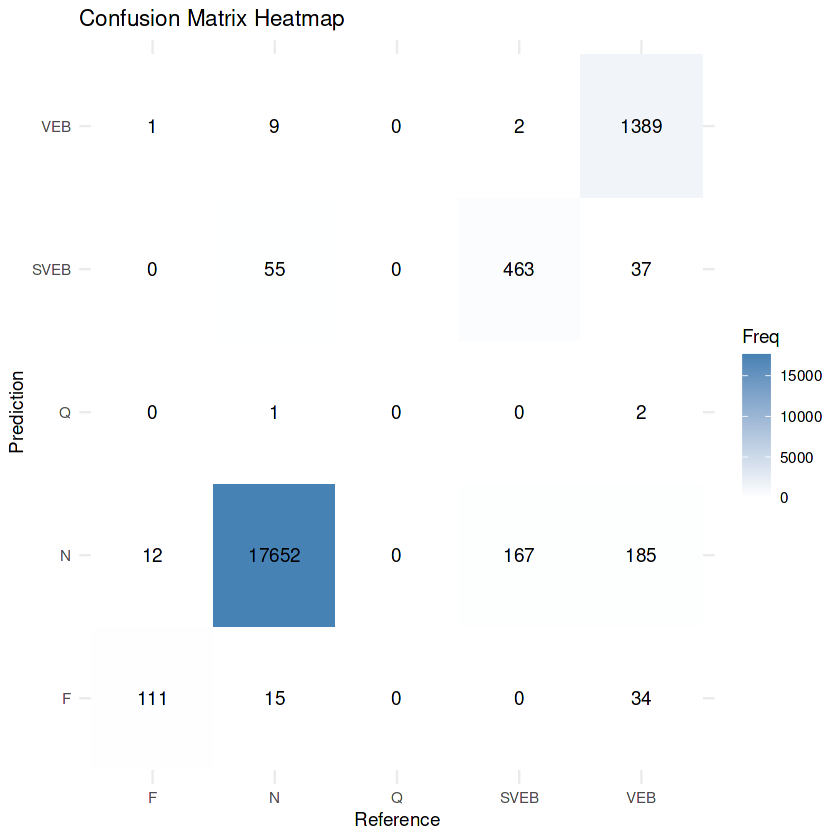

In [26]:
# Evaluation script for Random Forest model on test set
# Run this after you've trained rf_tuned1 model with the previous code

# Load required libraries if not already loaded
library(caret)
library(ggplot2)

# Make predictions on test data using the trained model
predictions <- predict(rf_tuned1, testAD)

# Calculate accuracy directly
correct_predictions <- sum(predictions == testAD$type)
total_predictions <- length(predictions)
direct_accuracy <- correct_predictions / total_predictions

cat("\nDirect Test Accuracy Calculation:\n")
cat("Correct predictions:", correct_predictions, "out of", total_predictions, "\n")
cat("Test Accuracy:", round(direct_accuracy * 100, 2), "%\n\n")

# Create confusion matrix
cm <- confusionMatrix(predictions, testAD$type)
print(cm)

# Calculate and print test accuracy metrics
test_accuracy <- cm$overall["Accuracy"]
test_kappa <- cm$overall["Kappa"]

cat("\nTest Set Performance Metrics:\n")
cat("Test Accuracy:", test_accuracy, "\n")
cat("Test Kappa:", test_kappa, "\n")

# Print class-specific metrics for each class in the test set
cat("\nClass-specific metrics on test set:\n")
print(cm$byClass)

# Calculate balanced accuracy for multiclass problem
class_recalls <- diag(cm$table) / rowSums(cm$table)
balanced_accuracy <- mean(class_recalls)
cat("\nBalanced Accuracy:", balanced_accuracy, "\n")

# Extract and print the cross-validation results
cat("\nCross-Validation Results for Best Model:\n")
cat("Best parameters:", paste(names(rf_tuned1$bestTune), "=", rf_tuned1$bestTune, collapse=", "), "\n")

best_params <- rf_tuned1$bestTune
cv_results <- rf_tuned1$results
best_cv_row <- which(
  cv_results$mtry == best_params$mtry & 
  cv_results$min.node.size == best_params$min.node.size & 
  cv_results$splitrule == best_params$splitrule
)

cat("CV Accuracy:", cv_results$Accuracy[best_cv_row], "\n")
cat("CV Accuracy SD:", cv_results$AccuracySD[best_cv_row], "\n")

# Create a heatmap of the confusion matrix
if(require(ggplot2)) {
  # Convert confusion matrix to a data frame for plotting
  cm_df <- as.data.frame(cm$table)
  colnames(cm_df) <- c("Reference", "Prediction", "Freq")
  
  # Create a heatmap of the confusion matrix
  cm_plot <- ggplot(cm_df, aes(x = Reference, y = Prediction, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_gradient(low = "white", high = "steelblue") +
    theme_minimal() +
    labs(title = "Confusion Matrix Heatmap")
  
  print(cm_plot)
}

# Print comparison of training vs test performance
if(exists("rf_tuned1")) {
  cat("\nComparison of Training vs Test Performance:\n")
  cat("Best CV Accuracy:", cv_results$Accuracy[best_cv_row], "\n")
  cat("Test Accuracy:", test_accuracy, "\n")
  cat("Difference:", round((test_accuracy - cv_results$Accuracy[best_cv_row]) * 100, 2), 
      "percentage points\n")
}

# Class distribution in test set
class_dist <- table(testAD$type)
class_percentages <- prop.table(class_dist) * 100

cat("\nClass Distribution in Test Set:\n")
for(i in 1:length(class_dist)) {
  cat(names(class_dist)[i], ":", class_dist[i], "samples (", 
      round(class_percentages[i], 1), "%)\n")
}



Direct Accuracy on SMOTE Training Set:
Correct predictions: 49829 out of 49829 
Accuracy: 100 %

Confusion Matrix and Statistics

          Reference
Prediction     F     N     Q  SVEB   VEB
      F     1929     0     0     0     0
      N        0 30000     0     0     0
      Q        0     0    12     0     0
      SVEB     0     0     0  6672     0
      VEB      0     0     0     0 11216

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9999, 1)
    No Information Rate : 0.6021     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: F Class: N  Class: Q Class: SVEB Class: VEB
Sensitivity           1.00000   1.0000 1.0000000      1.0000     1.0000
Specificity           1.00000   1.0000 1.0000000      1.0000     1.0000
Po

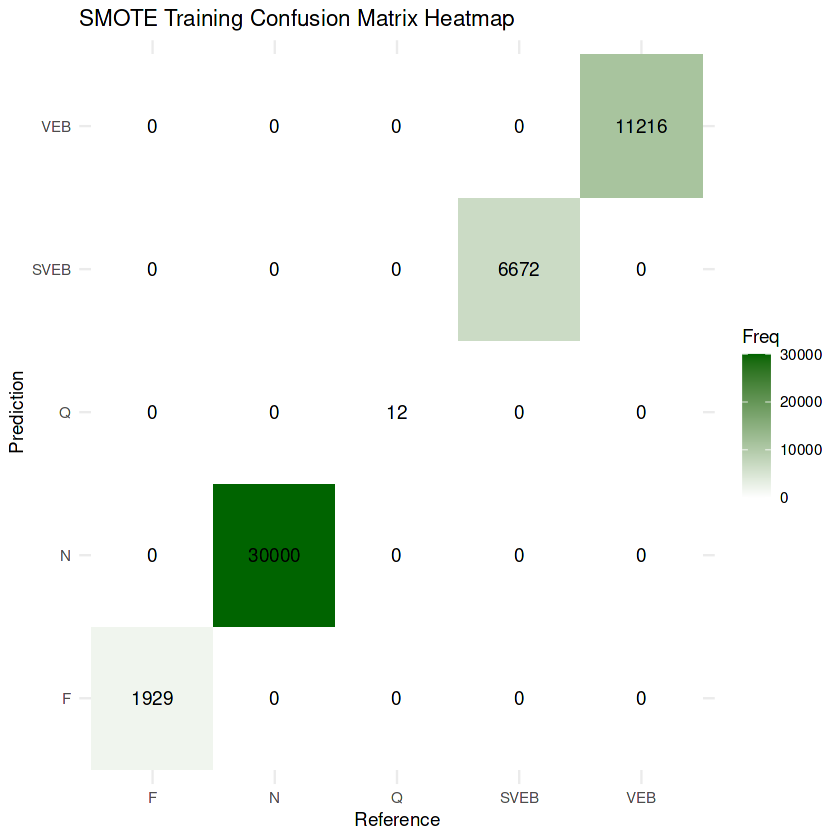

In [27]:
# Evaluation on SMOTE-balanced training set (trainAD_SMOTE2)

# Make predictions on the SMOTE-balanced training set
train_predictions <- predict(rf_tuned1, trainAD_SMOTE2)

# Direct accuracy calculation
train_correct <- sum(train_predictions == trainAD_SMOTE2$type)
train_total <- length(train_predictions)
train_direct_accuracy <- train_correct / train_total

cat("\nDirect Accuracy on SMOTE Training Set:\n")
cat("Correct predictions:", train_correct, "out of", train_total, "\n")
cat("Accuracy:", round(train_direct_accuracy * 100, 2), "%\n\n")

# Confusion matrix
train_cm <- confusionMatrix(train_predictions, trainAD_SMOTE2$type)
print(train_cm)

# Accuracy metrics
train_accuracy <- train_cm$overall["Accuracy"]
train_kappa <- train_cm$overall["Kappa"]

cat("\nSMOTE Training Set Performance Metrics:\n")
cat("Accuracy:", train_accuracy, "\n")
cat("Kappa:", train_kappa, "\n")

# Class-specific metrics
cat("\nClass-specific metrics on SMOTE Training Set:\n")
print(train_cm$byClass)

# Balanced accuracy
train_class_recalls <- diag(train_cm$table) / rowSums(train_cm$table)
train_balanced_accuracy <- mean(train_class_recalls)
cat("\nBalanced Accuracy:", train_balanced_accuracy, "\n")

# Heatmap of confusion matrix
if(require(ggplot2)) {
  train_cm_df <- as.data.frame(train_cm$table)
  colnames(train_cm_df) <- c("Reference", "Prediction", "Freq")
  
  train_cm_plot <- ggplot(train_cm_df, aes(x = Reference, y = Prediction, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_gradient(low = "white", high = "darkgreen") +
    theme_minimal() +
    labs(title = "SMOTE Training Confusion Matrix Heatmap")
  
  print(train_cm_plot)
}

# Class distribution in the SMOTE training set
smote_class_dist <- table(trainAD_SMOTE2$type)
smote_class_percent <- prop.table(smote_class_dist) * 100

cat("\nClass Distribution in SMOTE Training Set:\n")
for(i in 1:length(smote_class_dist)) {
  cat(names(smote_class_dist)[i], ":", smote_class_dist[i], "samples (", 
      round(smote_class_percent[i], 1), "%)\n")
}


previous results are from hyperparameter tuning and it has suggested that ntree = 200, mtry = 8, min.node.size = 1 , splitrule = "extratrees" is best when cross-validated with 10 folds and 3 repetitions. there fore model training using 500 trees under these conditions.

## FINAL MODEL TRAIN - RF

In [23]:
library(ranger)

control <- trainControl(
  method = "repeatedcv",
  number = 10,
  repeats = 3,
  classProbs = TRUE,
  savePredictions = "final"
)
model <- train(
  type ~ ., 
  data = trainAD_SMOTE2,
  method = "ranger",
  trControl = control,
  tuneGrid = data.frame(
    mtry = 8,
    splitrule = "extratrees",
    min.node.size = 1
  ),
  num.trees = 500,
  importance = 'impurity'
)

print(model)



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance




Growing trees.. Progress: 57%. Estimated remaining time: 23 seconds.
Growing trees.. Progress: 57%. Estimated remaining time: 23 seconds.
Growing trees.. Progress: 56%. Estimated remaining time: 24 seconds.
Growing trees.. Progress: 57%. Estimated remaining time: 23 seconds.
Growing trees.. Progress: 57%. Estimated remaining time: 23 seconds.
Growing trees.. Progress: 57%. Estimated remaining time: 23 seconds.
Growing trees.. Progress: 56%. Estimated remaining time: 24 seconds.
Growing trees.. Progress: 57%. Estimated remaining time: 23 seconds.
Growing trees.. Progress: 56%. Estimated remaining time: 24 seconds.
Growing trees.. Progress: 56%. Estimated remaining time: 24 seconds.
Growing trees.. Progress: 48%. Estimated remaining time: 33 seconds.
Growing trees.. Progress: 97%. Estimated remaining time: 1 seconds.
Random Forest 

49829 samples
   32 predictor
    5 classes: 'F', 'N', 'Q', 'SVEB', 'VEB' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes:

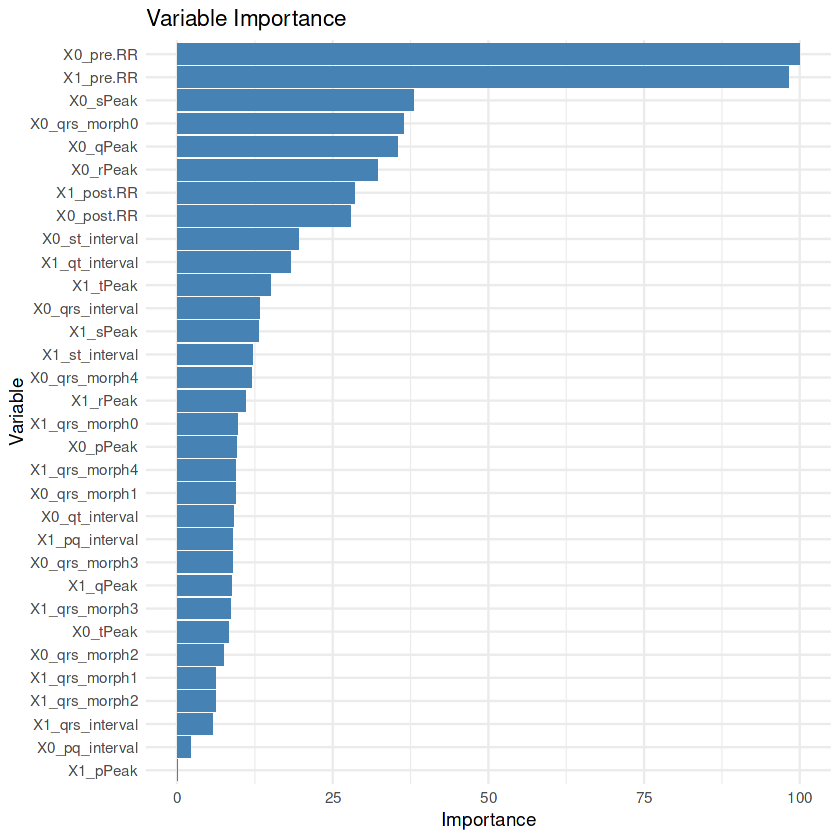

In [24]:
library(ggplot2)

# Get variable importance
importance <- varImp(model)

# Convert to data frame for plotting
imp_df <- as.data.frame(importance$importance)
imp_df$Variable <- rownames(imp_df)

# Plot
ggplot(imp_df, aes(x = reorder(Variable, Overall), y = Overall)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Variable Importance", x = "Variable", y = "Importance") +
  theme_minimal()


In [ ]:
# Generate predictions on the training data
train_predictions <- predict(model, newdata = trainAD_SMOTE2)

# Create confusion matrix for the training set
train_conf_matrix <- confusionMatrix(train_predictions, trainAD_SMOTE2$type)

# Print confusion matrix and metrics for the training data
print(train_conf_matrix)

# Extract specific metrics from training data
train_accuracy <- train_conf_matrix$overall['Accuracy']
train_sensitivity <- train_conf_matrix$byClass['Sensitivity']
train_specificity <- train_conf_matrix$byClass['Specificity']
train_precision <- train_conf_matrix$byClass['Precision']
train_f1_score <- train_conf_matrix$byClass['F1']

# Print metrics for training data
cat("Training Accuracy:", train_accuracy, "\n")
cat("Training Sensitivity:", train_sensitivity, "\n")
cat("Training Specificity:", train_specificity, "\n")
cat("Training Precision:", train_precision, "\n")
cat("Training F1 Score:", train_f1_score, "\n")


In [24]:
# Generate predictions on the testing data
test_predictions <- predict(model, newdata = testAD)

# Create confusion matrix for the testing set
test_conf_matrix <- confusionMatrix(test_predictions, testAD$type)

# Print confusion matrix and metrics for the testing data
print(test_conf_matrix)

# Extract specific metrics from testing data
test_accuracy <- test_conf_matrix$overall['Accuracy']
test_sensitivity <- test_conf_matrix$byClass['Sensitivity']
test_specificity <- test_conf_matrix$byClass['Specificity']
test_precision <- test_conf_matrix$byClass['Precision']
test_f1_score <- test_conf_matrix$byClass['F1']

# Print metrics for testing data
cat("Testing Accuracy:", test_accuracy, "\n")
cat("Testing Sensitivity:", test_sensitivity, "\n")
cat("Testing Specificity:", test_specificity, "\n")
cat("Testing Precision:", test_precision, "\n")
cat("Testing F1 Score:", test_f1_score, "\n")


Confusion Matrix and Statistics

          Reference
Prediction     F     N     Q  SVEB   VEB
      F      127     4     0     0     2
      N       17 17897     3    50    16
      Q        0     0     0     0     0
      SVEB     0    53     0   501     2
      VEB     16    62     0     4  1381

Overall Statistics
                                        
               Accuracy : 0.9886        
                 95% CI : (0.9871, 0.99)
    No Information Rate : 0.8948        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.9417        
                                        
 Mcnemar's Test P-Value : NA            

Statistics by Class:

                     Class: F Class: N Class: Q Class: SVEB Class: VEB
Sensitivity          0.793750   0.9934 0.000000     0.90270    0.98572
Specificity          0.999700   0.9594 1.000000     0.99719    0.99562
Pos Pred Value       0.954887   0.9952      NaN     0.90108    0.94395
Neg P

In [ ]:
library(iml)

X <- trainAD_SMOTE2[, setdiff(names(trainAD_SMOTE2), "type")]


predictor1 <- Predictor$new(
  model = model,
  data = X,
  y = trainAD_SMOTE2$type,
  type = "prob",              # classification
  class = "VEB"     # 🔁 change this to your actual positive class name
)

ice_obj1 <- FeatureEffect$new(predictor1, feature = "X0_pre.RR", method = "ice")
plot(ice_obj1)

# RF Model - Without SMOTE

Growing trees.. Progress: 97%. Estimated remaining time: 0 seconds.
Growing trees.. Progress: 78%. Estimated remaining time: 8 seconds.
Growing trees.. Progress: 96%. Estimated remaining time: 1 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 96%. Estimated remaining time: 1 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 96%. Estimated remaining time: 1 seconds.
Growing trees.. Progress: 78%. Estimated remaining time: 8 seconds.
Growing trees.. Progress: 95%. Estimated remaining time: 1 seconds.
Growing trees.. Progress: 79%. Estimated remaining time: 8 seconds.
Growing trees.. Progress: 96%. Estimated remaining time: 1 seconds.
Growing trees.. Progress: 76%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 96%. Estimated remaining time: 1 seconds.
Growing trees.. Progress: 78%. Estimated remaining time: 8 seconds.
Growing trees.. Progress: 96%. Estimated remaini

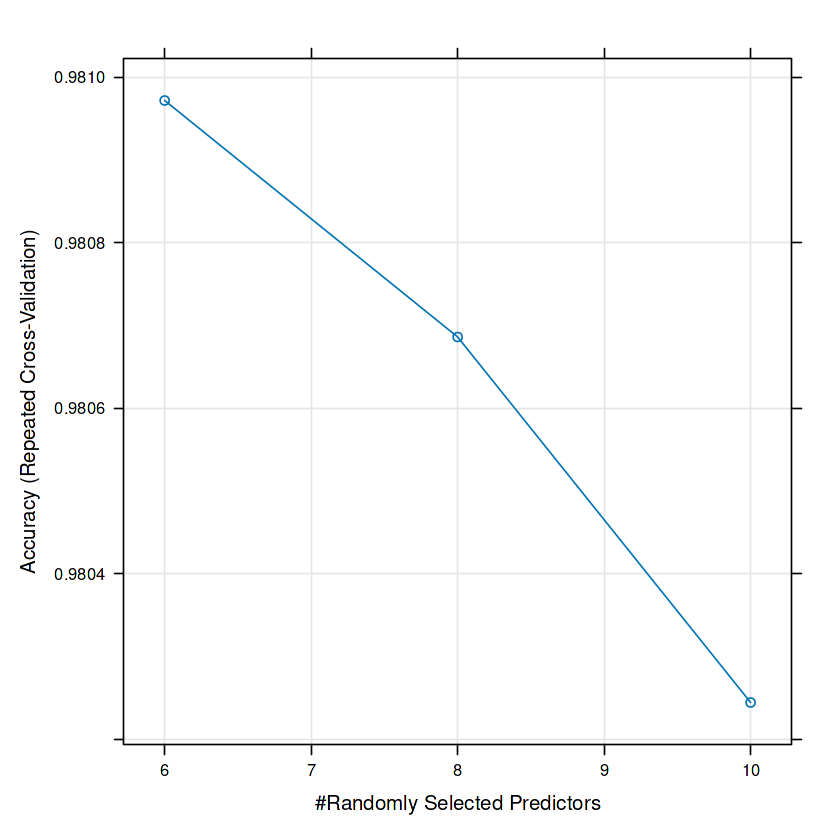

Confusion Matrix and Statistics

          Reference
Prediction     F     N     Q  SVEB   VEB
      F      115     4     0     0     1
      N       18 17879     2    66    13
      Q        0     0     0     0     0
      SVEB     0    39     0   471     2
      VEB     27    94     1    18  1385

Overall Statistics
                                          
               Accuracy : 0.9858          
                 95% CI : (0.9841, 0.9874)
    No Information Rate : 0.8948          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9274          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: F Class: N Class: Q Class: SVEB Class: VEB
Sensitivity          0.718750   0.9924 0.000000     0.84865    0.98858
Specificity          0.999750   0.9533 1.000000     0.99791    0.99253
Pos Pred Value       0.958333   0.9945      NaN     0.9199

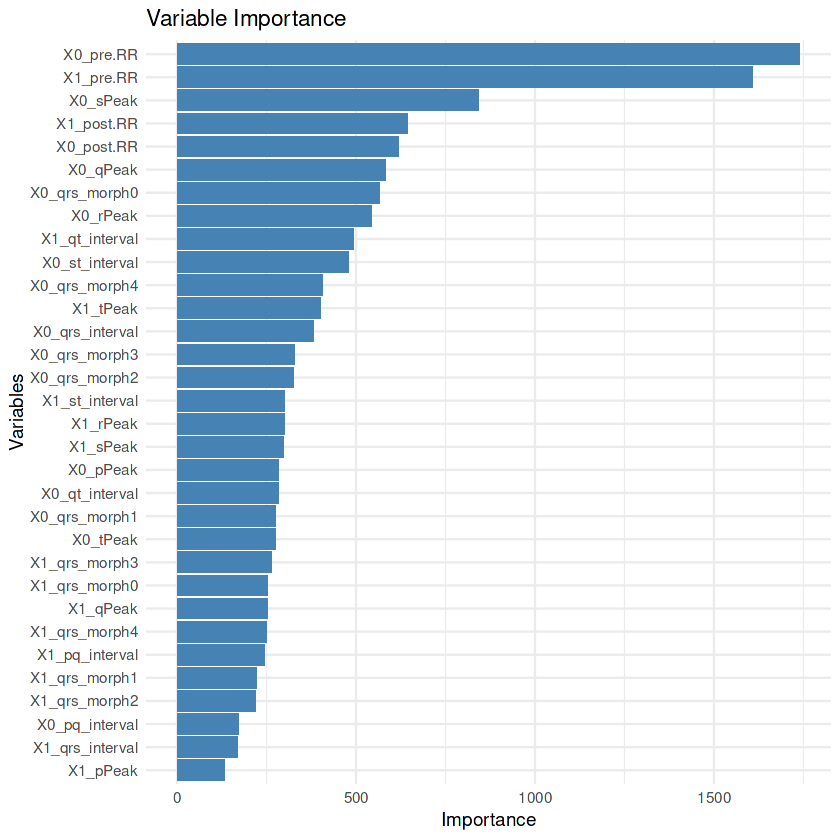

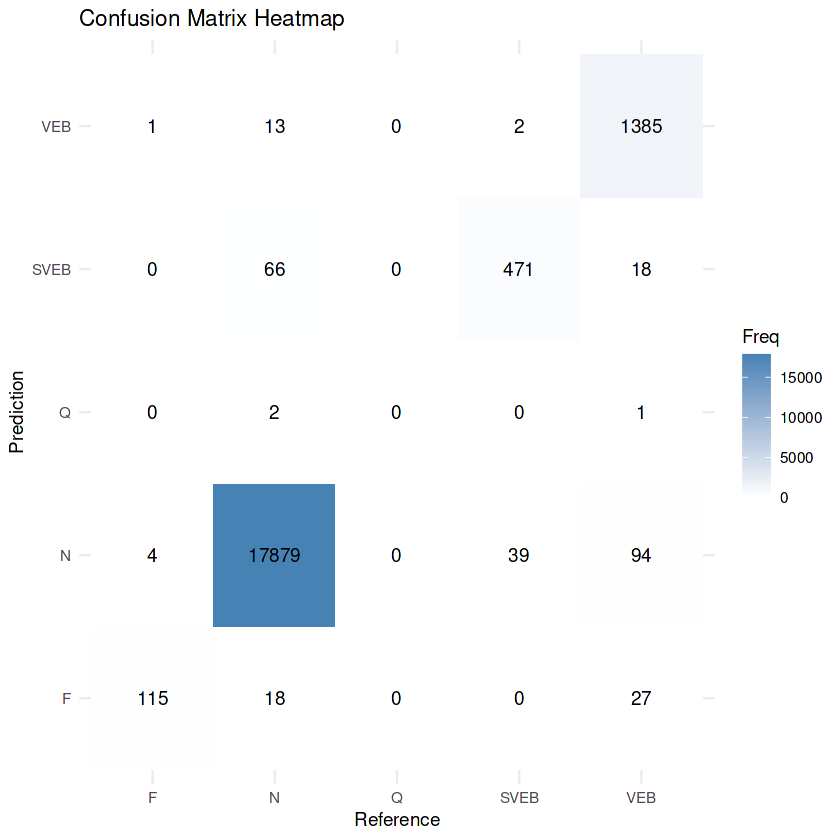

In [24]:
# Load required libraries
library(randomForest)
library(caret)
library(ggplot2)

# Set seed for reproducibility
set.seed(65000)

trainAD_RF <- trainAD # This is done to reduce the complexity of changing the variable names repeatedly. use as desire.

# Ensure Type variable is a factor
trainAD_RF$type <- as.factor(trainAD_RF$type)
testAD$type <- as.factor(testAD$type)

# Define the training control
# Using 10-fold cross-validation, repeated 3 times
ctrl <- trainControl(
  method = "repeatedcv",
  number = 10,
  repeats = 3,
  classProbs = TRUE,
  savePredictions = "final"
)

# Define the parameter grid
# mtry: Number of variables randomly sampled as candidates at each split
# min.node.size: Minimum size of terminal nodes
# splitrule: Rule used to split nodes
rf_grid <- expand.grid(
  mtry = c(6,8,10),
  min.node.size = c(1),
  splitrule = c("gini")
)

# Train the model with cross-validation and grid search
# Note: The ranger implementation of Random Forest is used by caret for grid search
rf_tuned <- train(
  type ~ .,
  data = trainAD_RF,
  method = "ranger",
  num.trees = 500,
  importance = "impurity",
  tuneGrid = rf_grid,
  trControl = ctrl,
  metric = "Accuracy"
)

# Display results
print(rf_tuned)
print(rf_tuned$bestTune)

# Plot the results
plot(rf_tuned)

# Get the best model
best_model <- rf_tuned$finalModel

# Variable importance
var_importance <- ranger::importance(best_model)
var_imp_df <- data.frame(
  Variable = names(var_importance),
  Importance = var_importance
)
var_imp_df <- var_imp_df[order(-var_imp_df$Importance),]

# Plot variable importance
ggplot(var_imp_df, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  theme_minimal() +
  labs(x = "Variables", y = "Importance", title = "Variable Importance")

# Make predictions on test data using the best model
predictions <- predict(rf_tuned, testAD)

# Create confusion matrix
cm <- confusionMatrix(predictions, testAD$type)
print(cm)

# Calculate and print additional performance metrics
accuracy <- cm$overall["Accuracy"]
precision <- cm$byClass["Pos Pred Value"]
recall <- cm$byClass["Sensitivity"]
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("\nPerformance Metrics:\n")
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

# For multi-class problems, we can create a confusion matrix visualization
# This gives a better view of classification performance for multiple classes
if(require(ggplot2)) {
  # Convert confusion matrix to a data frame for plotting
  cm_df <- as.data.frame(cm$table)
  colnames(cm_df) <- c("Reference", "Prediction", "Freq")
  
  # Create a heatmap of the confusion matrix
  ggplot(cm_df, aes(x = Reference, y = Prediction, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_gradient(low = "white", high = "steelblue") +
    theme_minimal() +
    labs(title = "Confusion Matrix Heatmap")
}


Direct Test Accuracy Calculation:
Correct predictions: 19850 out of 20135 
Test Accuracy: 98.58 %

Confusion Matrix and Statistics

          Reference
Prediction     F     N     Q  SVEB   VEB
      F      115     4     0     0     1
      N       18 17879     2    66    13
      Q        0     0     0     0     0
      SVEB     0    39     0   471     2
      VEB     27    94     1    18  1385

Overall Statistics
                                          
               Accuracy : 0.9858          
                 95% CI : (0.9841, 0.9874)
    No Information Rate : 0.8948          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9274          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: F Class: N Class: Q Class: SVEB Class: VEB
Sensitivity          0.718750   0.9924 0.000000     0.84865    0.98858
Specificity          0.999750

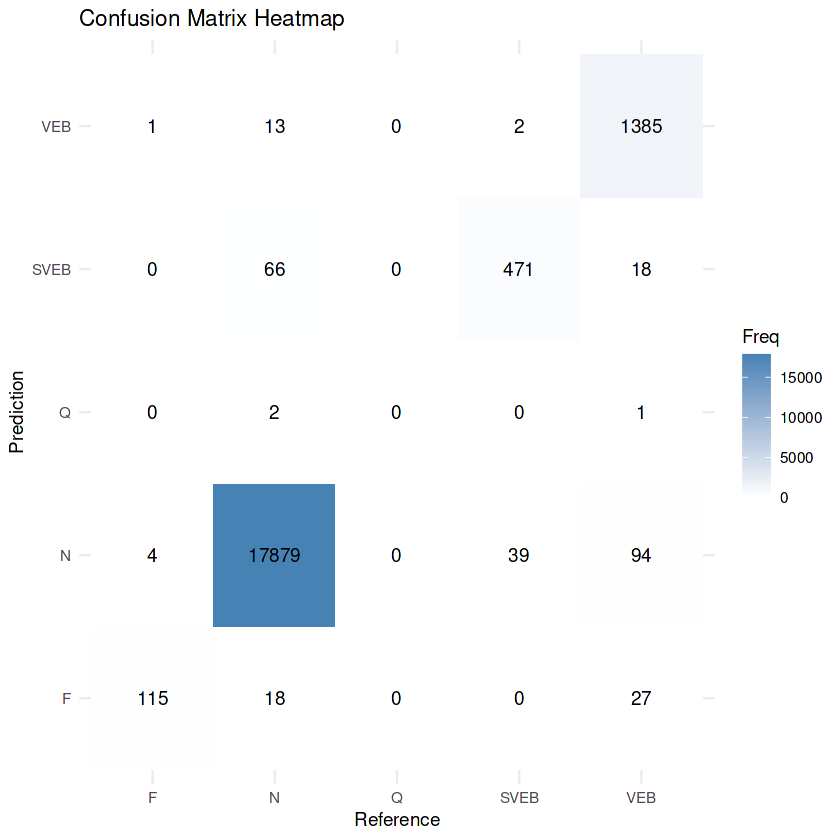

In [25]:
library(caret)
library(ggplot2)

# Make predictions on test data using the trained model
predictions <- predict(rf_tuned, testAD)

# Calculate accuracy directly
correct_predictions <- sum(predictions == testAD$type)
total_predictions <- length(predictions)
direct_accuracy <- correct_predictions / total_predictions

cat("\nDirect Test Accuracy Calculation:\n")
cat("Correct predictions:", correct_predictions, "out of", total_predictions, "\n")
cat("Test Accuracy:", round(direct_accuracy * 100, 2), "%\n\n")

# Create confusion matrix
cm <- confusionMatrix(predictions, testAD$type)
print(cm)

# Calculate and print test accuracy metrics
test_accuracy <- cm$overall["Accuracy"]
test_kappa <- cm$overall["Kappa"]

cat("\nTest Set Performance Metrics:\n")
cat("Test Accuracy:", test_accuracy, "\n")
cat("Test Kappa:", test_kappa, "\n")

# Print class-specific metrics for each class in the test set
cat("\nClass-specific metrics on test set:\n")
print(cm$byClass)

# Calculate balanced accuracy for multiclass problem
class_recalls <- diag(cm$table) / rowSums(cm$table)
balanced_accuracy <- mean(class_recalls)
cat("\nBalanced Accuracy:", balanced_accuracy, "\n")

# Extract and print the cross-validation results
cat("\nCross-Validation Results for Best Model:\n")
cat("Best parameters:", paste(names(rf_tuned$bestTune), "=", rf_tuned$bestTune, collapse=", "), "\n")

best_params <- rf_tuned$bestTune
cv_results <- rf_tuned$results
best_cv_row <- which(
  cv_results$mtry == best_params$mtry & 
  cv_results$min.node.size == best_params$min.node.size & 
  cv_results$splitrule == best_params$splitrule
)

cat("CV Accuracy:", cv_results$Accuracy[best_cv_row], "\n")
cat("CV Accuracy SD:", cv_results$AccuracySD[best_cv_row], "\n")

# Create a heatmap of the confusion matrix
if(require(ggplot2)) {
  # Convert confusion matrix to a data frame for plotting
  cm_df <- as.data.frame(cm$table)
  colnames(cm_df) <- c("Reference", "Prediction", "Freq")
  
  # Create a heatmap of the confusion matrix
  cm_plot <- ggplot(cm_df, aes(x = Reference, y = Prediction, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_gradient(low = "white", high = "steelblue") +
    theme_minimal() +
    labs(title = "Confusion Matrix Heatmap")
  
  print(cm_plot)
}

# Print comparison of training vs test performance
if(exists("rf_tuned")) {
  cat("\nComparison of Training vs Test Performance:\n")
  cat("Best CV Accuracy:", cv_results$Accuracy[best_cv_row], "\n")
  cat("Test Accuracy:", test_accuracy, "\n")
  cat("Difference:", round((test_accuracy - cv_results$Accuracy[best_cv_row]) * 100, 2), 
      "percentage points\n")
}

# Class distribution in test set
class_dist <- table(testAD$type)
class_percentages <- prop.table(class_dist) * 100

cat("\nClass Distribution in Test Set:\n")
for(i in 1:length(class_dist)) {
  cat(names(class_dist)[i], ":", class_dist[i], "samples (", 
      round(class_percentages[i], 1), "%)\n")
}

# SVM-RADIAL 

In [ ]:
# Load required libraries
library(caret)
library(ggplot2)

# Set seed for reproducibility
set.seed(75000)

trainAD_SVM <- trainAD

# Ensure Type variable is a factor
trainAD_SVM$type <- as.factor(trainAD_SVM$type)
testAD$type <- as.factor(testAD$type)

# Define training control
ctrl <- trainControl(
  method = "repeatedcv",
  number = 10,
  repeats = 3,
  classProbs = TRUE,
  savePredictions = "final"
)

# Define parameter grid for svmRadial
# sigma: inverse kernel width
# C: cost of constraints violation (regularization)
svm_grid <- expand.grid(
  sigma = c(0.001, 0.01, 0.1),
  C = c(0.25, 0.5, 1)
)

# Train SVM model with radial kernel
svm_tuned <- train(
  type ~ .,
  data = trainAD_SVM,
  method = "svmRadial",
  tuneGrid = svm_grid,
  trControl = ctrl,
  metric = "Accuracy"
)

# Display results
print(svm_tuned)
print(svm_tuned$bestTune)

# Plot tuning results
plot(svm_tuned)

# Make predictions
predictions <- predict(svm_tuned, testAD)

# Confusion matrix
cm <- confusionMatrix(predictions, testAD$type)
print(cm)

# Calculate performance metrics
accuracy <- cm$overall["Accuracy"]
precision <- cm$byClass["Pos Pred Value"]
recall <- cm$byClass["Sensitivity"]
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("\nPerformance Metrics:\n")
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

# Confusion matrix heatmap
if(require(ggplot2)) {
  cm_df <- as.data.frame(cm$table)
  colnames(cm_df) <- c("Reference", "Prediction", "Freq")
  
  ggplot(cm_df, aes(x = Reference, y = Prediction, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_gradient(low = "white", high = "steelblue") +
    theme_minimal() +
    labs(title = "SVM Confusion Matrix Heatmap")
}


# QDA

for smote with mode 3

In [69]:
library(UBL)
trainAD_SMOTE3 <- SmoteClassif(type ~ ., trainAD, 
                          C.perc = list(F = 3, N = 1, Q = 100, SVEB = 3, VEB = 2), 
                          k = 10)

In [70]:
table(trainAD_SMOTE3$type)


    F     N     Q  SVEB   VEB 
 1929 30000  1200  6672 11216 

In [71]:
colnames(trainAD_SMOTE3)

[1] "type"            "X0_pre.RR"       "X0_post.RR"      "X0_pPeak"       
 [5] "X0_tPeak"        "X0_rPeak"        "X0_sPeak"        "X0_qPeak"       
 [9] "X0_qrs_interval" "X0_pq_interval"  "X0_qt_interval"  "X0_st_interval" 
[13] "X0_qrs_morph0"   "X0_qrs_morph1"   "X0_qrs_morph2"   "X0_qrs_morph3"  
[17] "X0_qrs_morph4"   "X1_pre.RR"       "X1_post.RR"      "X1_pPeak"       
[21] "X1_tPeak"        "X1_rPeak"        "X1_sPeak"        "X1_qPeak"       
[25] "X1_qrs_interval" "X1_pq_interval"  "X1_qt_interval"  "X1_st_interval" 
[29] "X1_qrs_morph0"   "X1_qrs_morph1"   "X1_qrs_morph2"   "X1_qrs_morph3"  
[33] "X1_qrs_morph4"

In [72]:
library(caret)
library(MASS)  # for qda model support

library(dplyr)
trainAD_SMOTE3$X1_pre.RR <- NULL
trainAD_SMOTE3$X1_post.RR <- NULL
trainAD_SMOTE3$X0_qrs_morph0 <- NULL
trainAD_SMOTE3$X0_qrs_morph1 <- NULL
trainAD_SMOTE3$X0_qrs_morph2 <- NULL
trainAD_SMOTE3$X0_qrs_morph3 <- NULL
trainAD_SMOTE3$X1_qrs_morph0 <- NULL
trainAD_SMOTE3$X1_qrs_morph1 <- NULL
trainAD_SMOTE3$X1_qrs_morph2 <- NULL
trainAD_SMOTE3$X1_qrs_morph3 <- NULL
trainAD_SMOTE3$X1_qrs_morph4 <- NULL

In [73]:
# Make sure the outcome variable is a factor
trainAD_SMOTE3$type <- as.factor(trainAD_SMOTE3$type)
testAD$type <- as.factor(testAD$type)

# Create stratified folds
folds <- createMultiFolds(trainAD_SMOTE3$type, k = 5, times = 3)

# Set trainControl with SMOTE and class probs
ctrl <- trainControl(
  method = "repeatedcv",
  number = 10,
  repeats = 3,
  classProbs = TRUE,
  savePredictions = "final",
  index = folds,
  summaryFunction = multiClassSummary
)

# Train QDA model
qda_model <- train(
  type ~ .,
  data = trainAD_SMOTE3,
  method = "qda",
  metric = "Accuracy",   # or "ROC" if using twoClassSummary
  trControl = ctrl
)

# Output the model summary
print(qda_model)

Warning message:
“model fit failed for Fold1.Rep1: parameter=none Error in qda.default(x, grouping, ...) : rank deficiency in group F
”
Warning message:
“model fit failed for Fold2.Rep1: parameter=none Error in qda.default(x, grouping, ...) : rank deficiency in group F
”
Warning message:
“model fit failed for Fold3.Rep1: parameter=none Error in qda.default(x, grouping, ...) : rank deficiency in group F
”
Warning message:
“model fit failed for Fold4.Rep1: parameter=none Error in qda.default(x, grouping, ...) : rank deficiency in group F
”
Warning message:
“model fit failed for Fold5.Rep1: parameter=none Error in qda.default(x, grouping, ...) : rank deficiency in group F
”
Warning message:
“model fit failed for Fold1.Rep2: parameter=none Error in qda.default(x, grouping, ...) : rank deficiency in group F
”
Warning message:
“model fit failed for Fold2.Rep2: parameter=none Error in qda.default(x, grouping, ...) : rank deficiency in group F
”
Warning message:
“model fit failed for Fold3.Rep

Something is wrong; all the Accuracy metric values are missing:
    logLoss         AUC          prAUC        Accuracy       Kappa    
 Min.   : NA   Min.   : NA   Min.   : NA   Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA   1st Qu.: NA   1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA   Median : NA   Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN   Mean   :NaN   Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA   Max.   : NA   Max.   : NA   Max.   : NA  
 NA's   :1     NA's   :1     NA's   :1     NA's   :1     NA's   :1    
    Mean_F1    Mean_Sensitivity Mean_Specificity Mean_Pos_Pred_Value
 Min.   : NA   Min.   : NA      Min.   : NA      Min.   : NA        
 1st Qu.: NA   1st Qu.: NA      1st Qu.: NA      1st Qu.: NA        
 Median : NA   Median : NA      Median : NA      Median : NA        
 Mean   :NaN   Mean   :NaN      Mean   :NaN      Mean   :NaN        
 3rd Qu.: NA   3rd Qu.:

ERROR: Error: Stopping


In [ ]:
# Predict classes
qda_preds <- predict(qda_model, testAD)

# Predict probabilities
qda_probs <- predict(qda_model, testAD, type = "prob")

# Confusion matrix
cm <- confusionMatrix(qda_preds, testAD$type)
print(cm)

# Calculate metrics
accuracy <- cm$overall["Accuracy"]
precision <- cm$byClass["Pos Pred Value"]
recall <- cm$byClass["Sensitivity"]
f1 <- 2 * (precision * recall) / (precision + recall)

cat("\nPerformance Metrics:\n")
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1, "\n")


# RF MODEL WITH REDUCED VARIABLES
the PCA and correlation matrix suggest that the model has multicollinearity on some varibles.majority of the morph features has connection to one another in 2lead signals.  